# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## **Import Packages**

In [7]:
#import required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
#set style for graph
sns.set_style(style='darkgrid')

#set max columns display limit
pd.set_option("display.max_columns",None)

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

## **Data Preparation**

## **Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#CSV file location
path = '/content/drive/MyDrive/DATASET/bank-full.xlsx'

## **Reading Data in notebook**

In [9]:
df = pd.read_excel(path)

## **Data Inspection**

In [10]:
#first look checking top 5 rows of data
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [11]:
#check bottom 5 rows of data
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [12]:
#check the informaation about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
#check discriptive statistics
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

* Age ranges from 18 to 95.
* We have duration max for a 4918 seconds.
*  We have balance ranges from -8019 to 102127.

In [14]:
#check column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [15]:
#First create copy of dataset before working with it
df1 = df.copy()

## **Check columns and their unique values to understand what they contain**

In [16]:
#check unique values in categorical columns
categorical_columns = df1.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()} and number of categories are {len(categorical_columns[col].unique())} \n')

Unique values in categorical columns job are: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] and number of categories are 12 

Unique values in categorical columns marital are: ['married' 'single' 'divorced'] and number of categories are 3 

Unique values in categorical columns education are: ['tertiary' 'secondary' 'unknown' 'primary'] and number of categories are 4 

Unique values in categorical columns default are: ['no' 'yes'] and number of categories are 2 

Unique values in categorical columns housing are: ['yes' 'no'] and number of categories are 2 

Unique values in categorical columns loan are: ['no' 'yes'] and number of categories are 2 

Unique values in categorical columns contact are: ['unknown' 'cellular' 'telephone'] and number of categories are 3 

Unique values in categorical columns month are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

In [17]:
#check unique values in numerical columns
numerical_columns = df1._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:8]}\n')

Unique values in numerical columns age are: [58 44 33 47 35 28 42 43]

Unique values in numerical columns balance are: [2143   29    2 1506    1  231  447  121]

Unique values in numerical columns day are: [ 5  6  7  8  9 12 13 14]

Unique values in numerical columns duration are: [261 151  76  92 198 139 217 380]

Unique values in numerical columns campaign are: [1 2 3 5 4 6 7 8]

Unique values in numerical columns pdays are: [ -1 151 166  91  86 143 147  89]

Unique values in numerical columns previous are: [ 0  3  1  4  2 11 16  6]



## **Handling missing values**

In [18]:
#check null values
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see there are no null values in our dataset.

In [19]:
#check for duplicate rows
df1.duplicated().value_counts()

False    45211
dtype: int64

As we can see there are no duplicate row in our dataset.

## **EDA**

## **Distribution of categorical features**

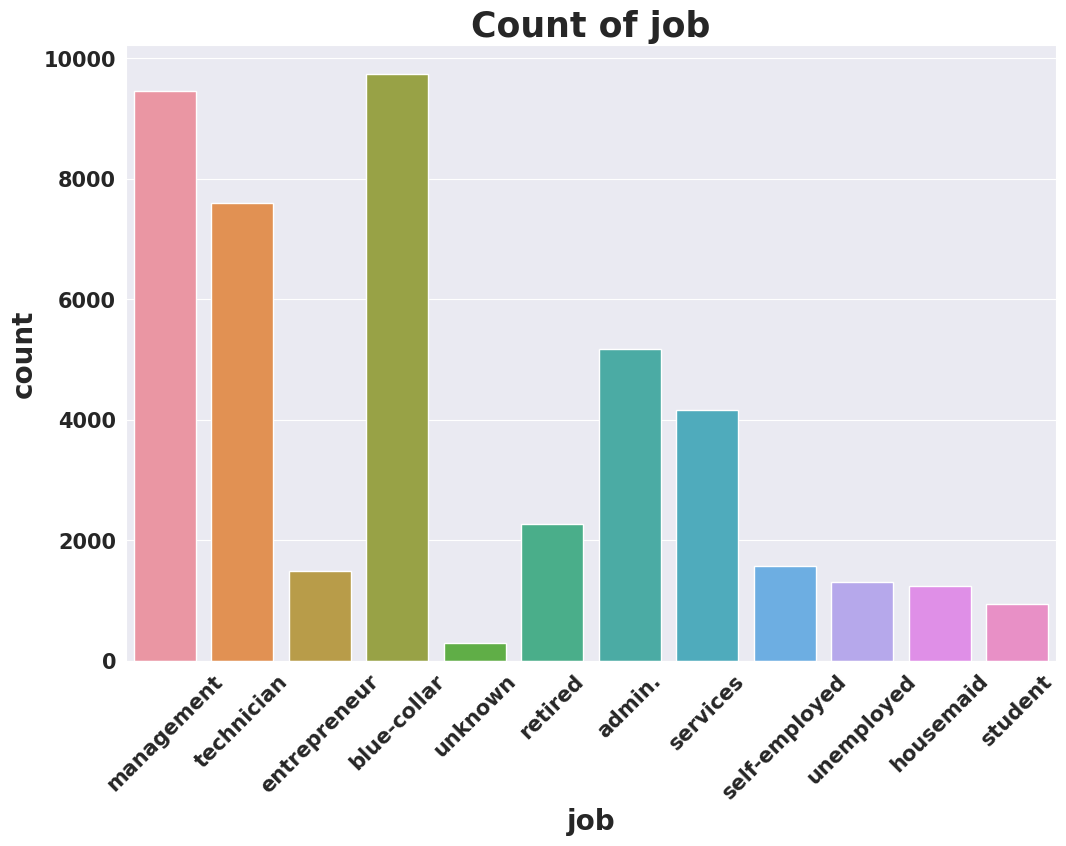

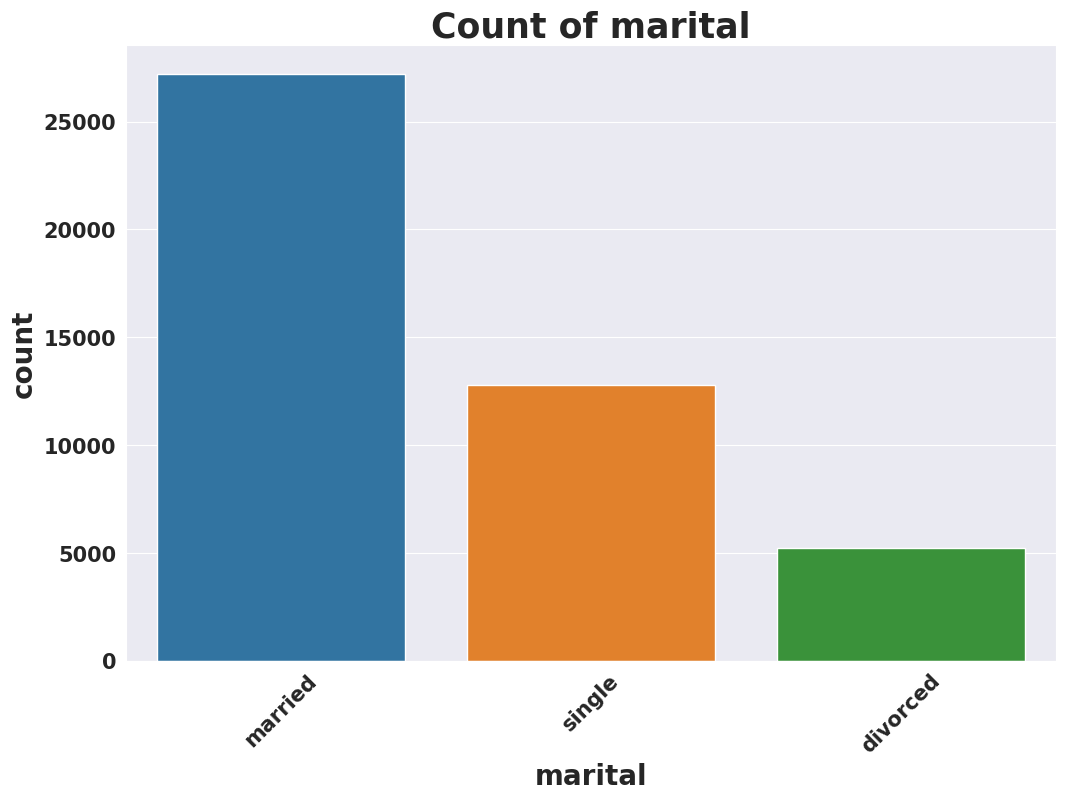

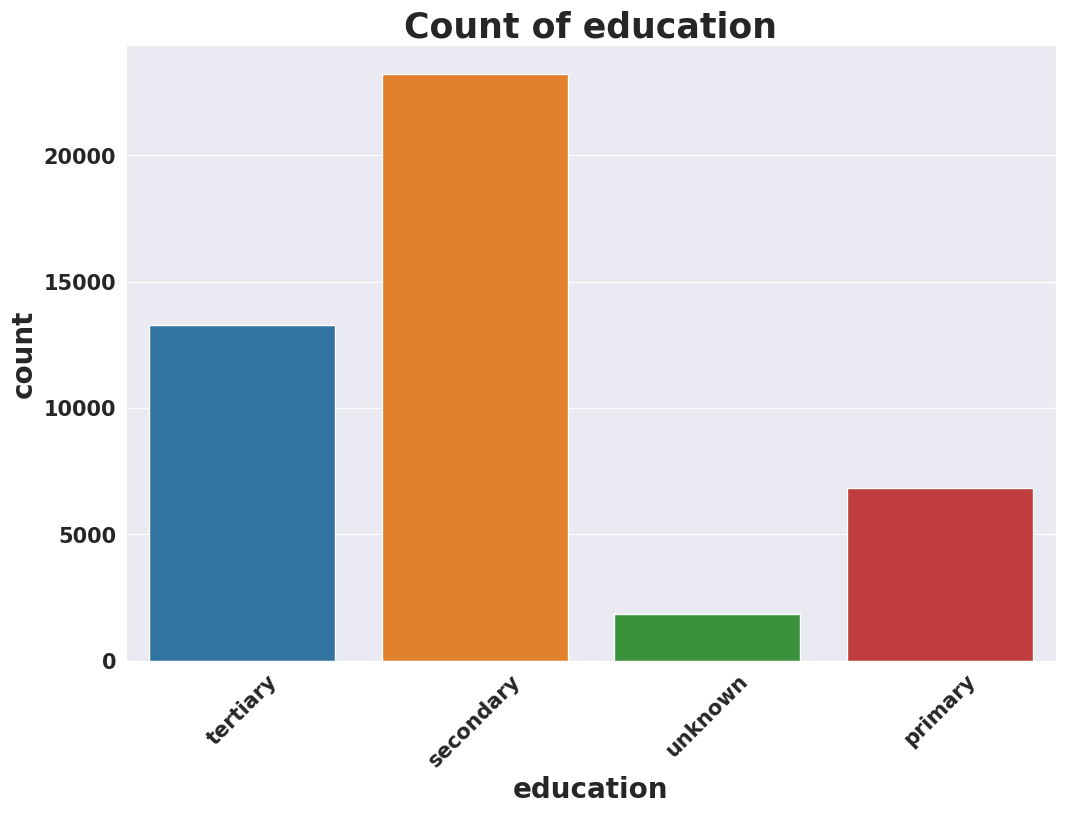

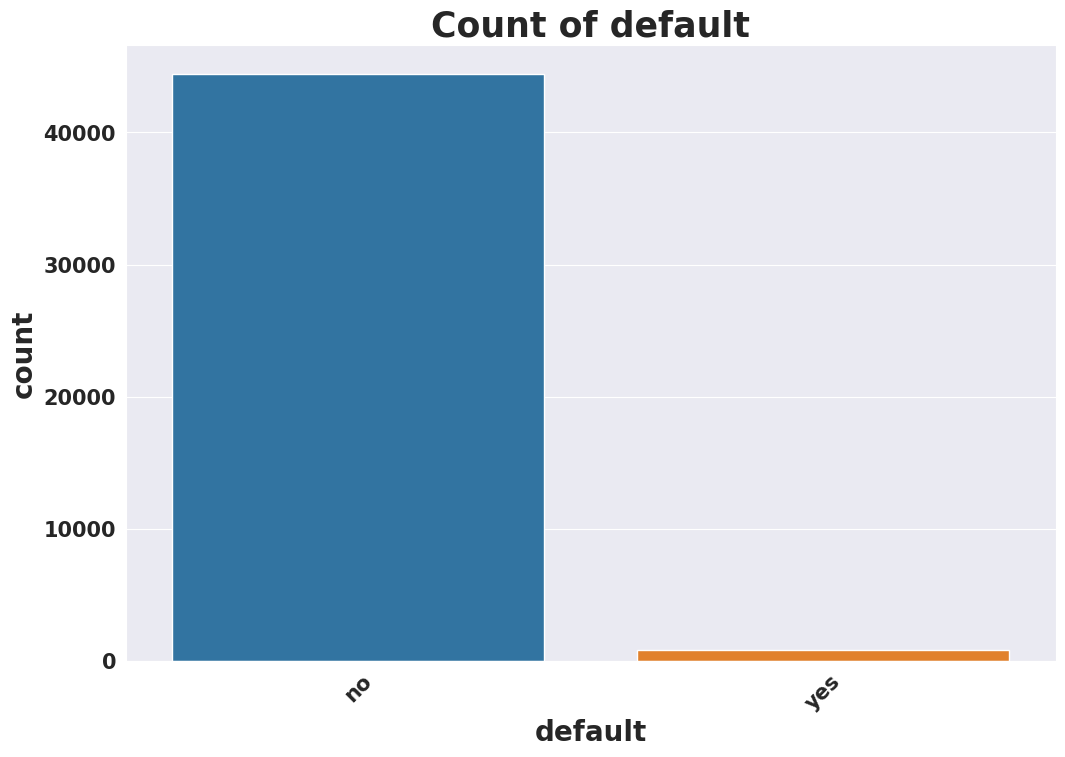

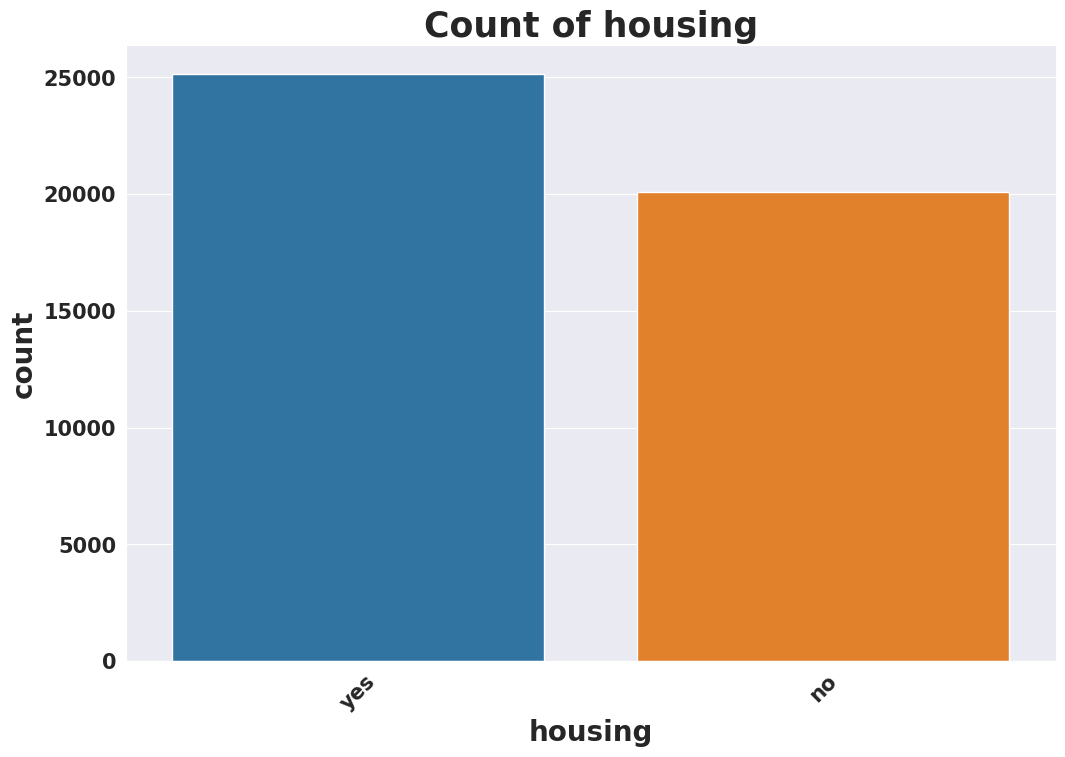

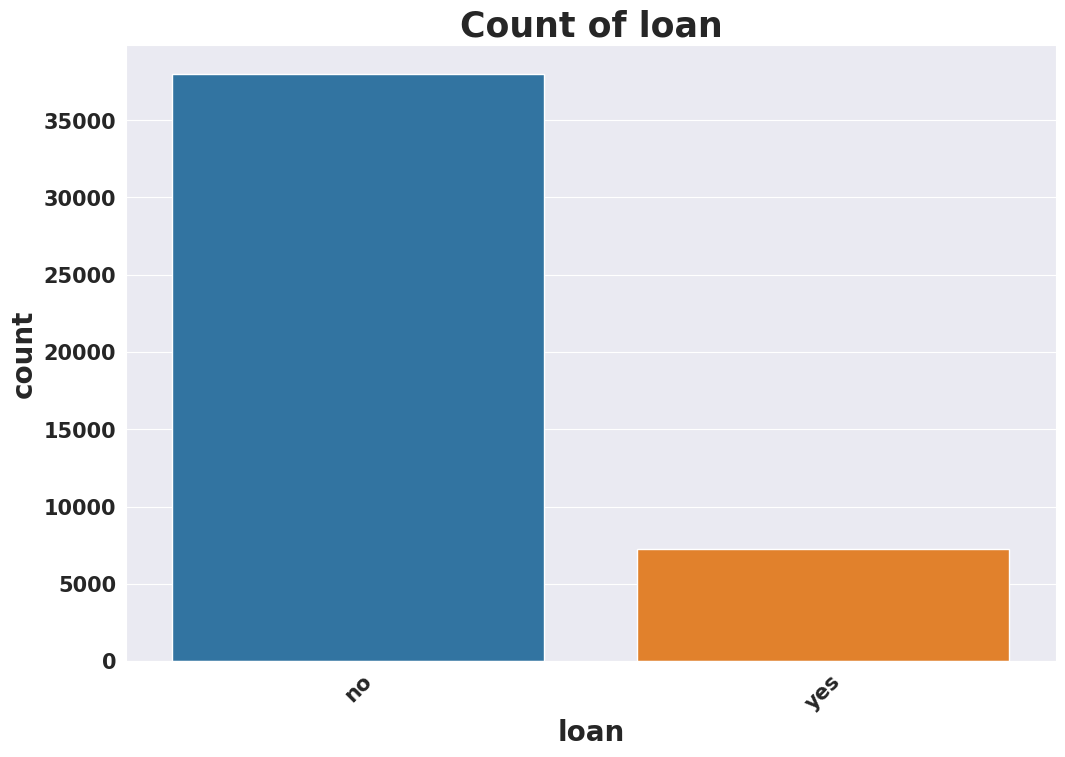

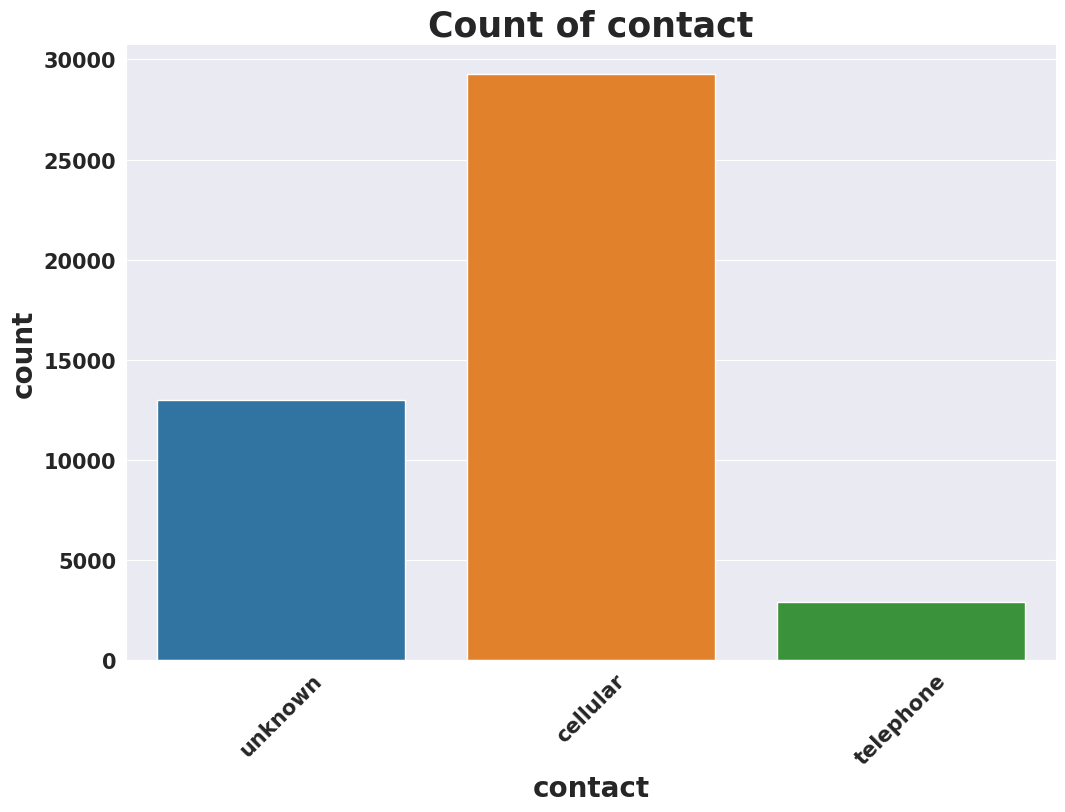

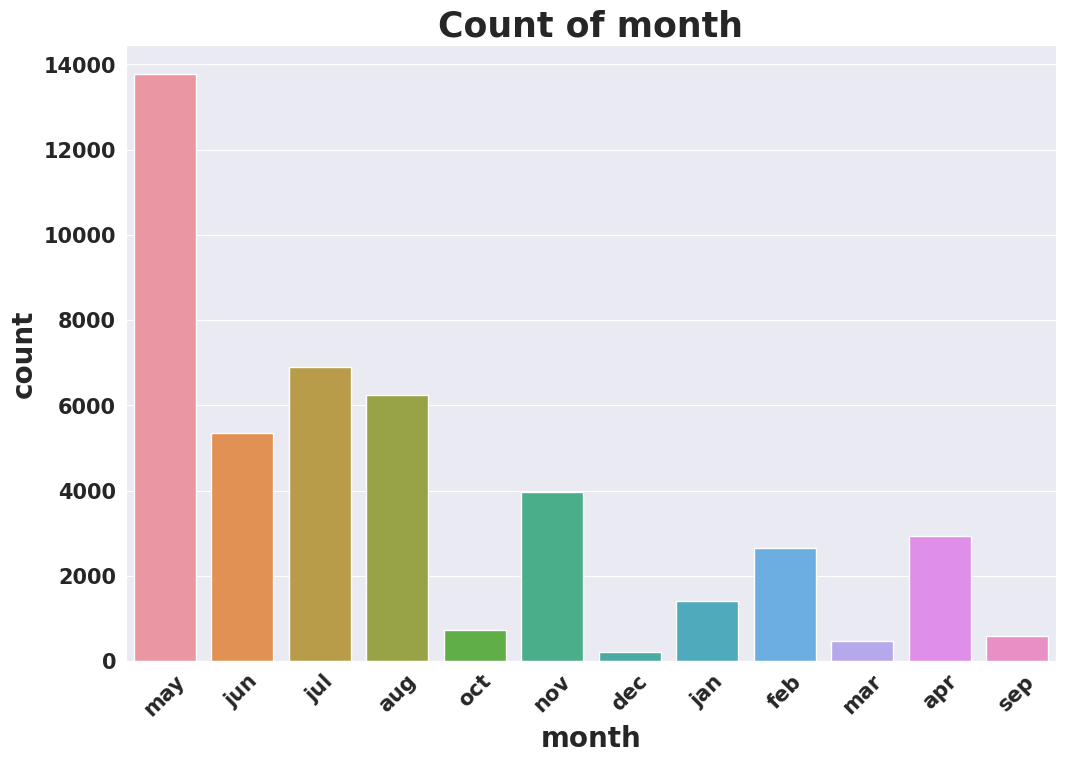

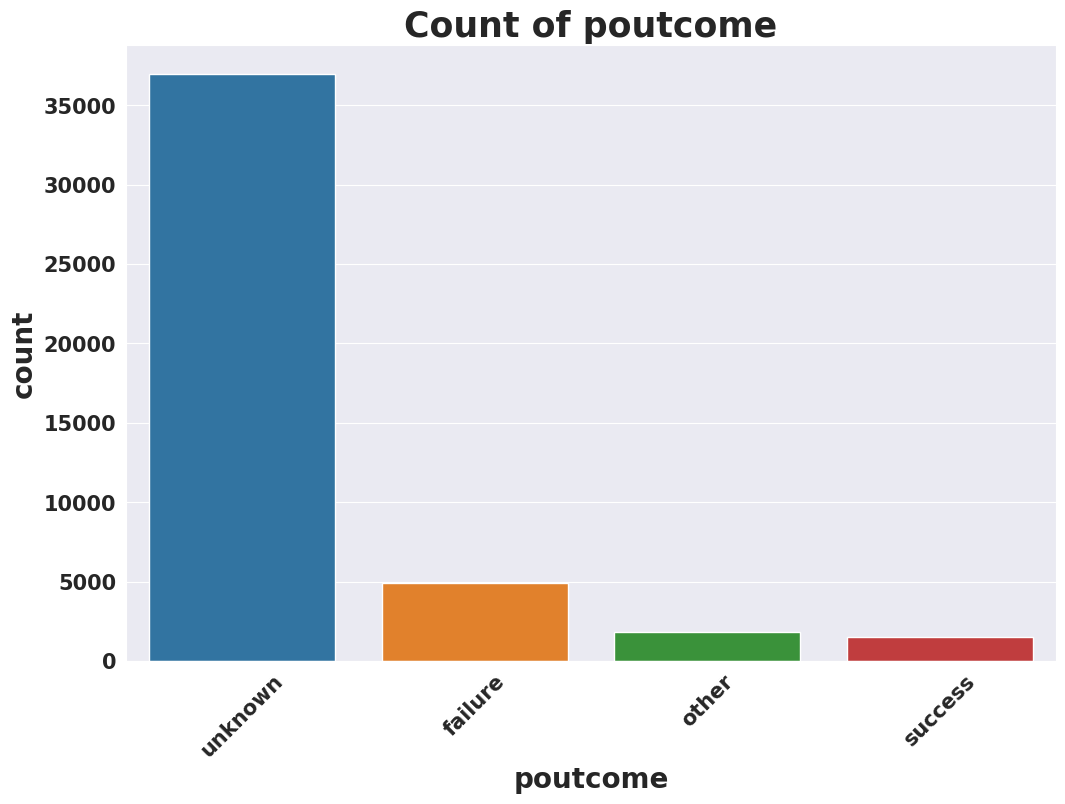

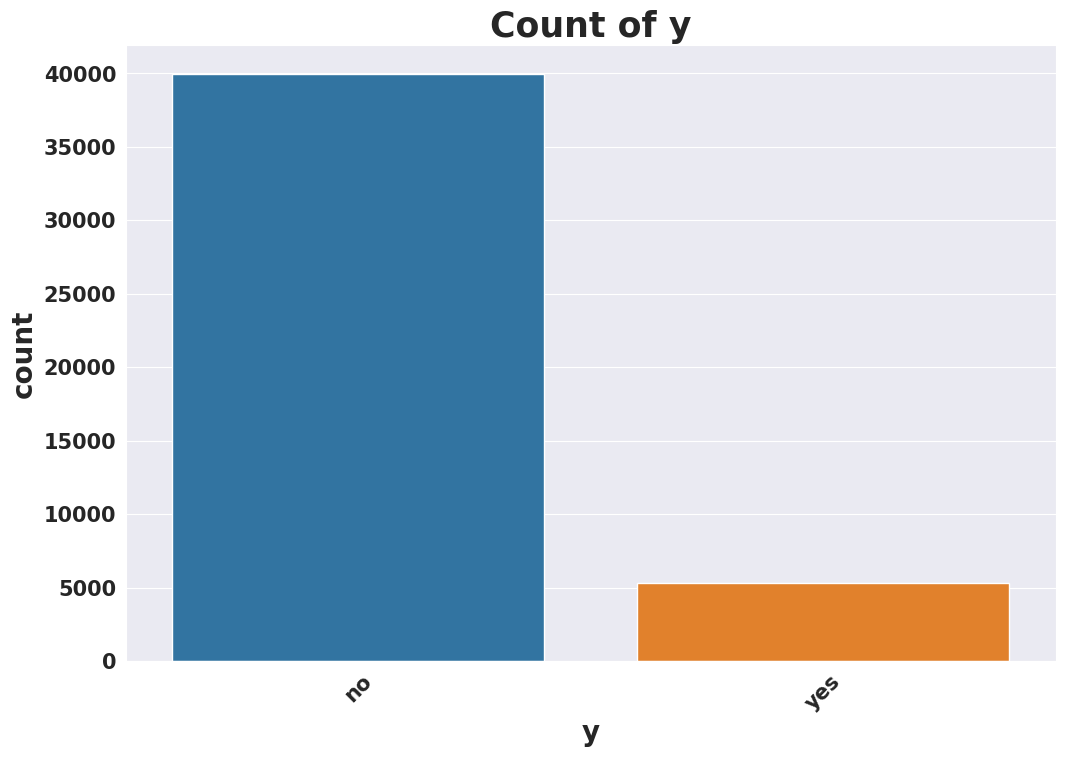

In [21]:
# checking count of each categorical feature

# running for loop to plot every category counts, setting figure size, title, xlabel, and title
for category in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=category, data=df1)
    plt.xlabel(category)
    plt.xticks(rotation=45)
    plt.title(f'Count of {category}')

    # Display the plot
    plt.show()


### **Inference**


*   Management and blue collor has the highest distribution and unknown has the lowest.
*   We have maximum data of married people.
*  Secondary and tertiory education background clients are highest in the dataset.
* Client who has no credit in default is maximum and who has is very low near to 1 %.
* Client with no personal loan are more in dataset.
* Previous outcome is unknown in maximum cases  might be the because there was no proper reason given for the same.
* We have maximum data available for the month of may,june,july and august.
* Y which is our target variable we can see there are more no results than yes. As it is classification problem and we have class imbalance which is the problem we have to solve this class imbalance before training model.



## **Relation between categorical features and label**



In [22]:
#now let's check relation between cat feature and outcome variable but first we have to drop our outcome variable from categorical columns
cat_features= categorical_columns.drop('y',axis=1)

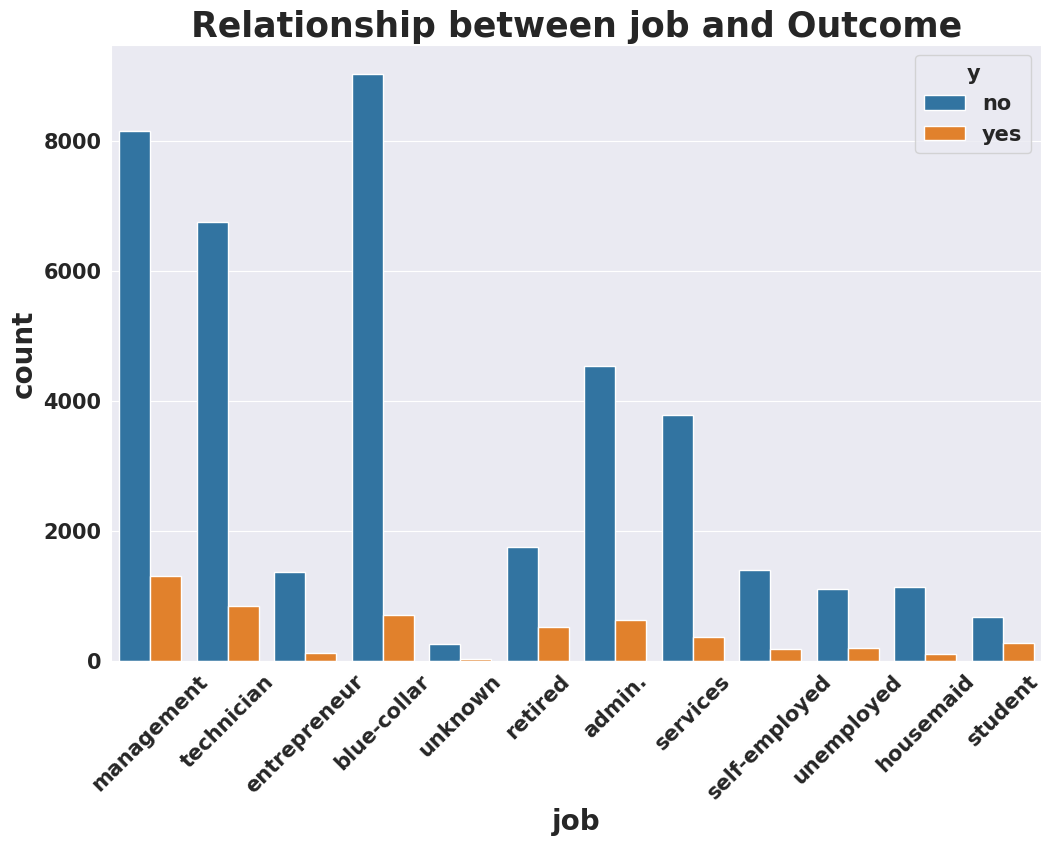

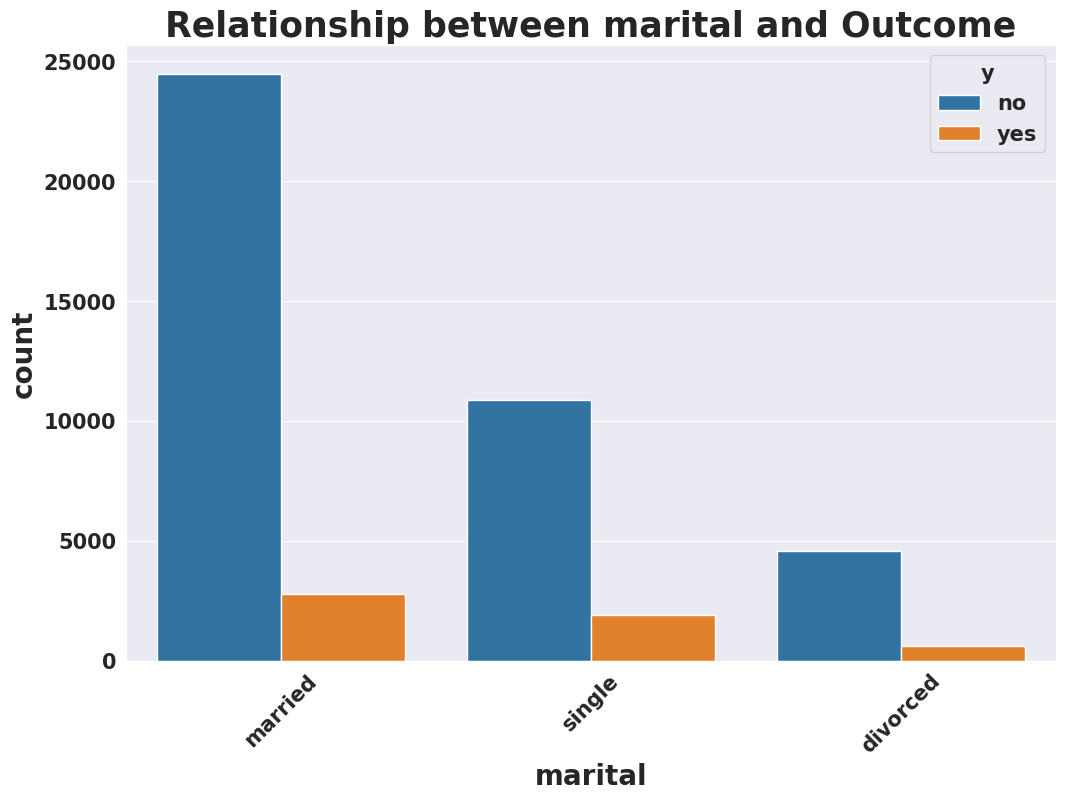

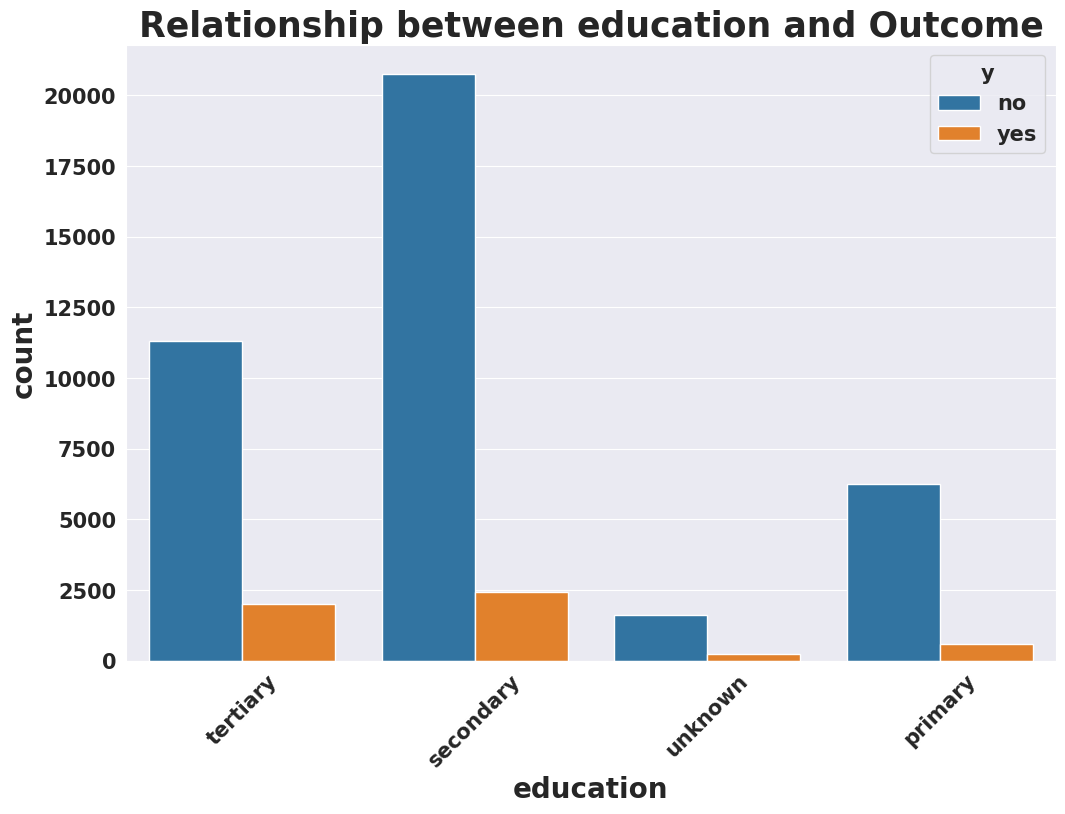

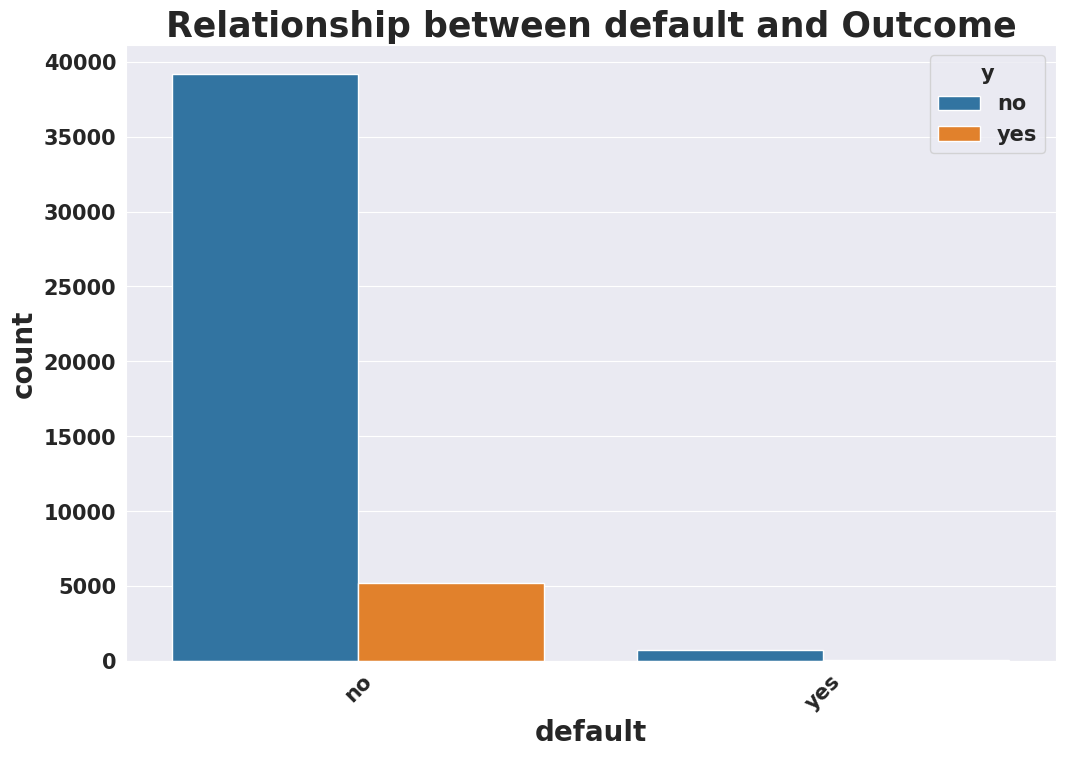

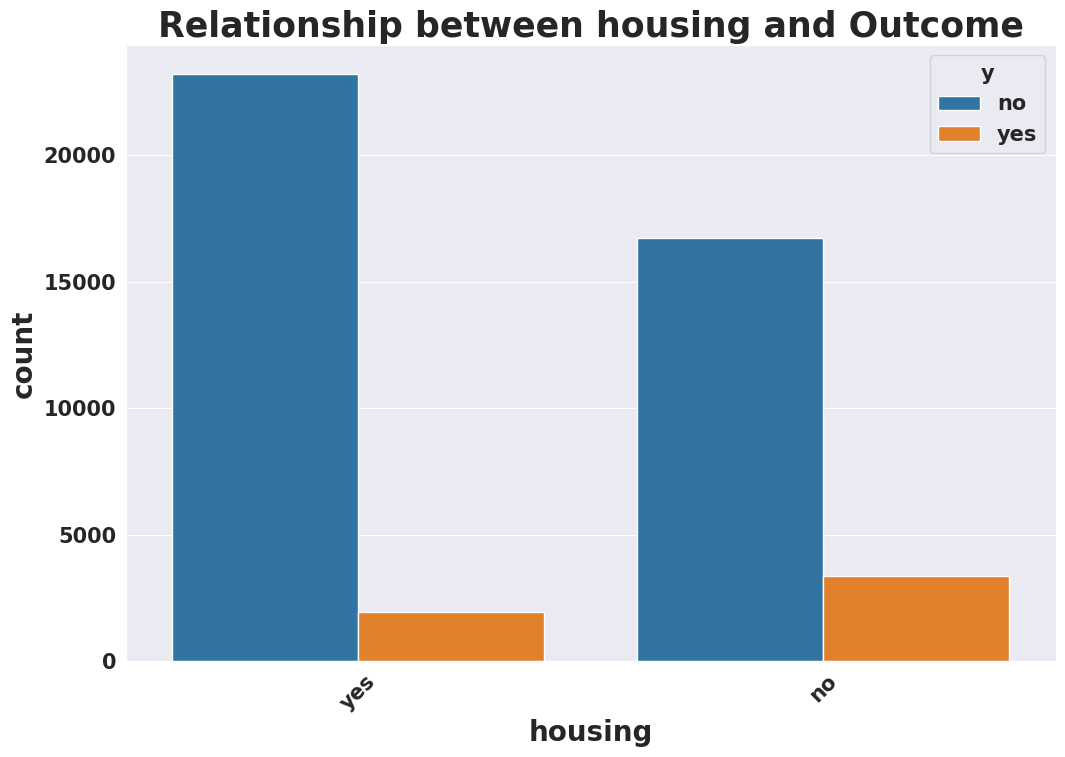

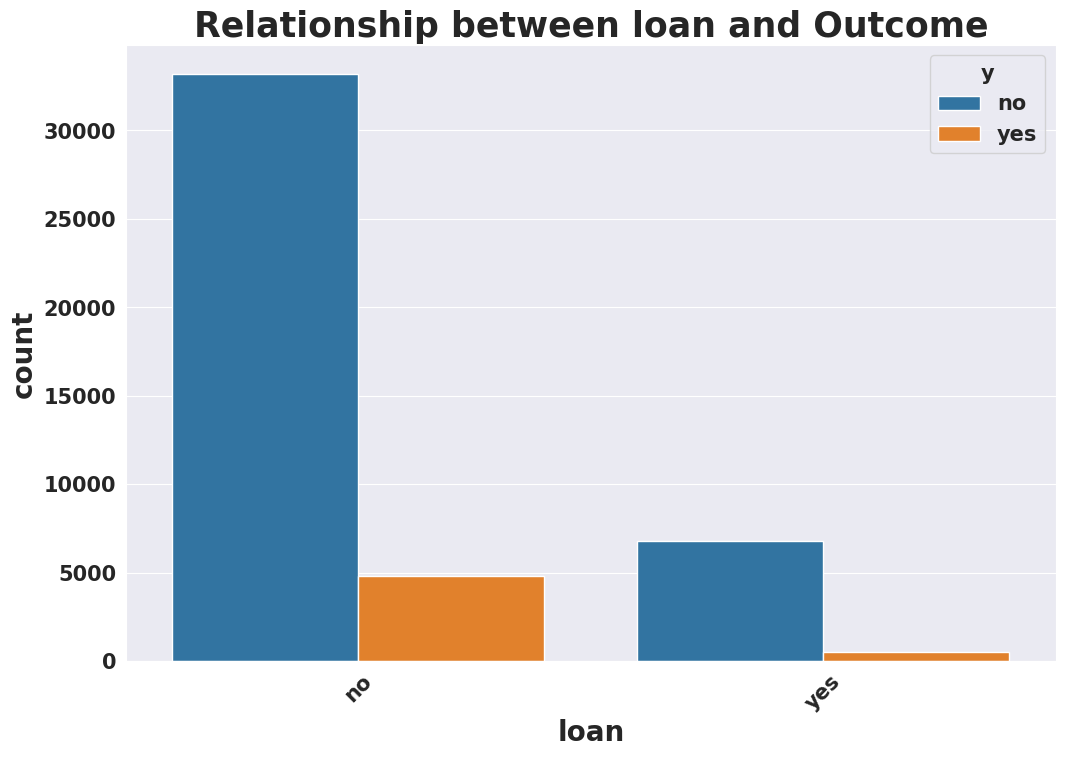

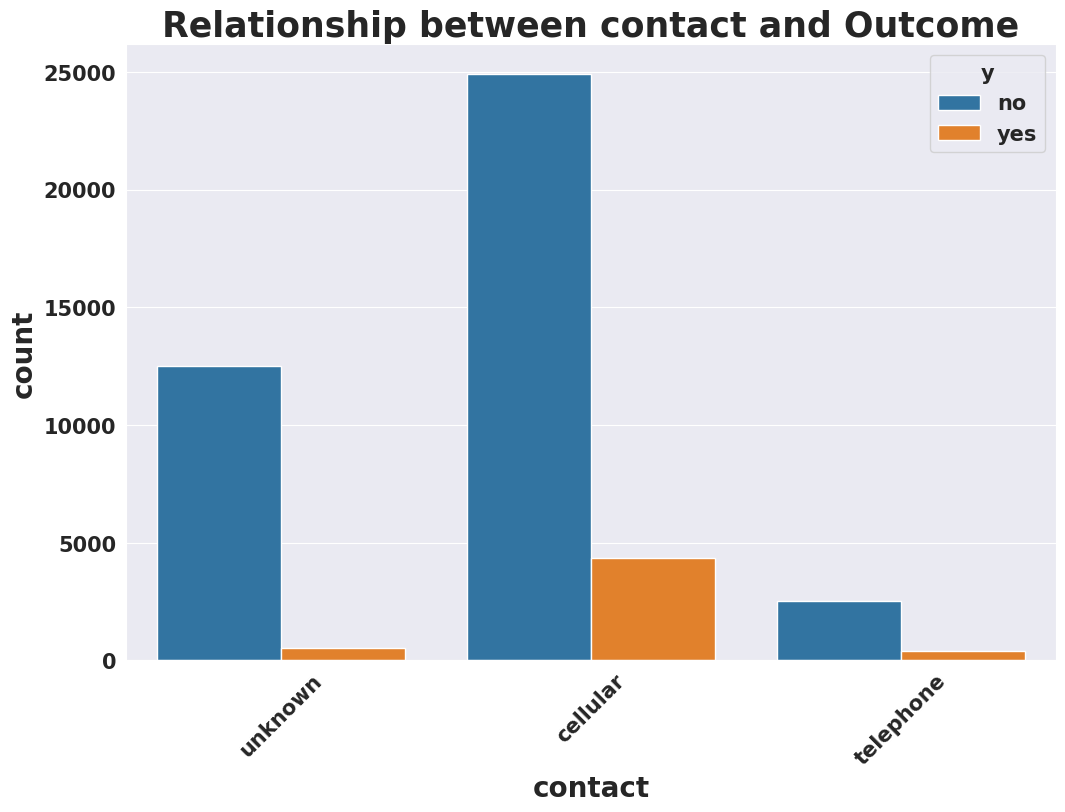

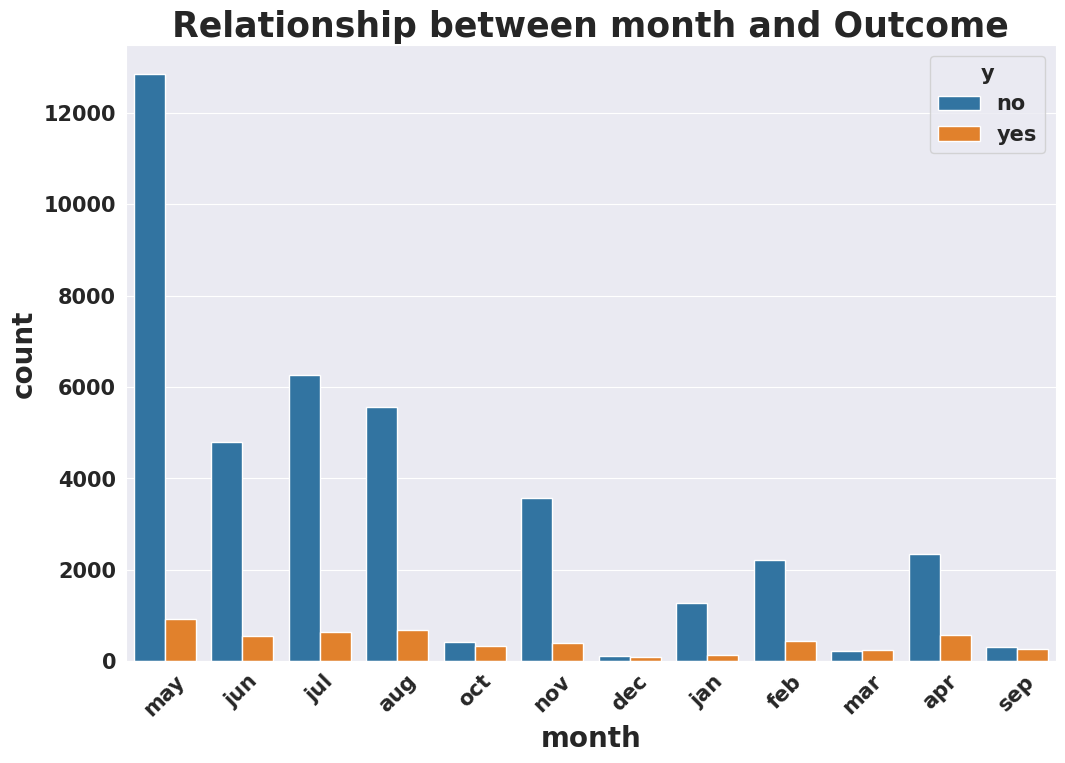

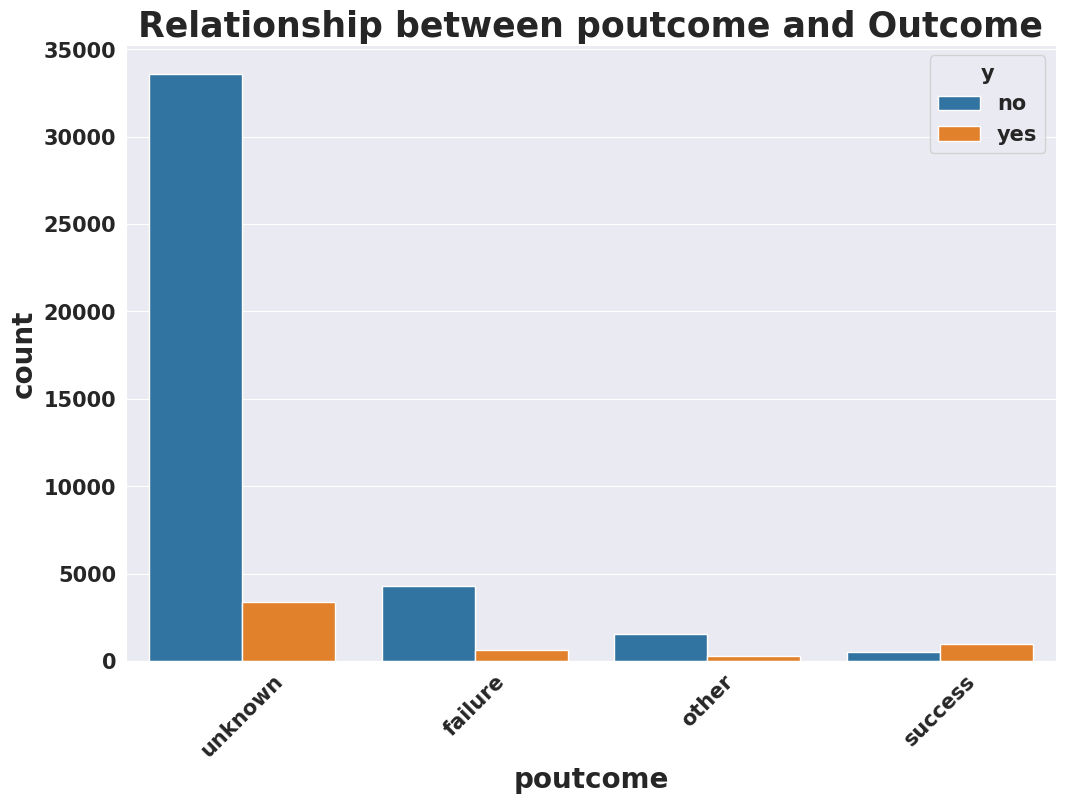

In [24]:
# Creating a for loop to plot the relationship between categorical features and outcome
for cat in cat_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=cat, hue='y', data=df1)
    plt.xlabel(cat)
    plt.xticks(rotation=45)
    plt.title(f'Relationship between {cat} and Outcome')

    # Display the plot
    plt.show()


### **Inference**

* Client who are in management and technician profession seems to be more interested in deposit.
* Married people are slightly more interested in making deposit.
* Client who has no credit in default are higher in making deposit.
* Client who has housing loan seems not to be much interested in making deposit.
* If previous campaign outcome is sucess (poutcome) then their is high chance of client to show interest in deposit.




## **Exploring numerical features**


In [25]:
numerical_columns

age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]

## **Distribution of numerical features**

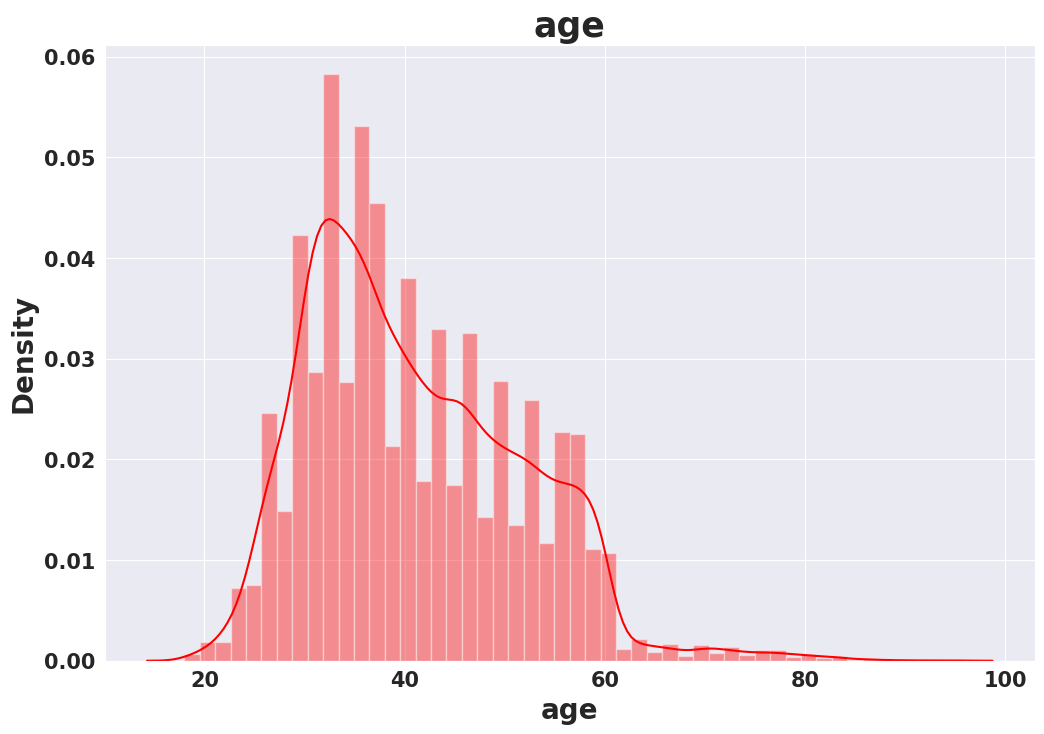

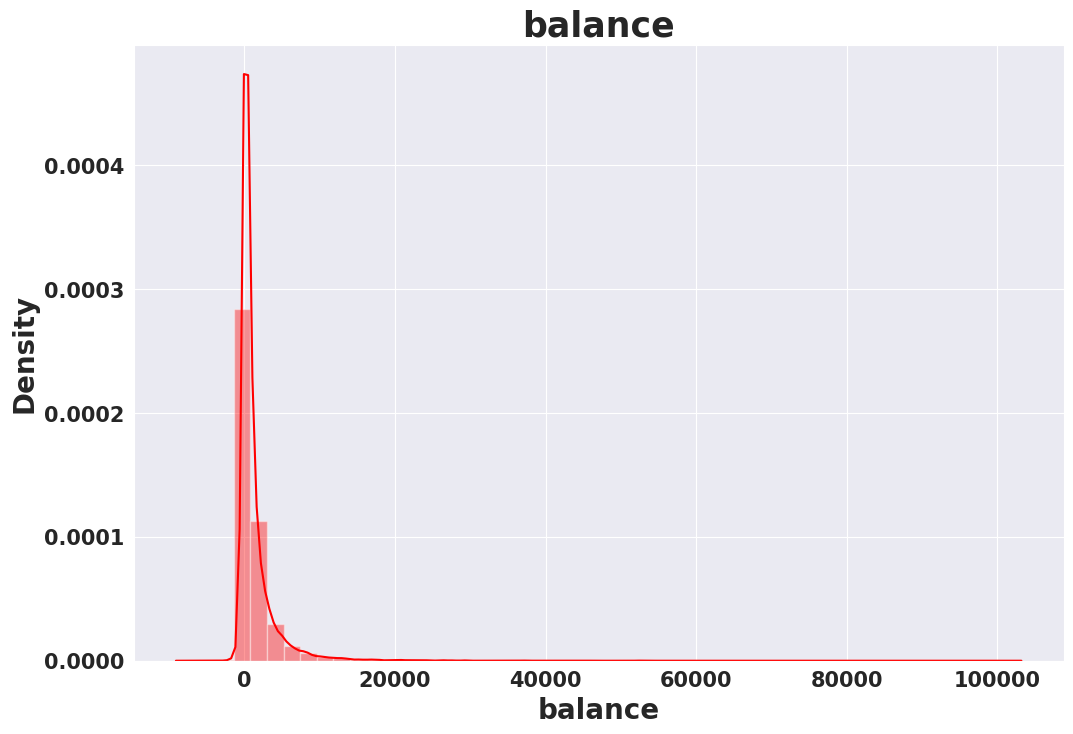

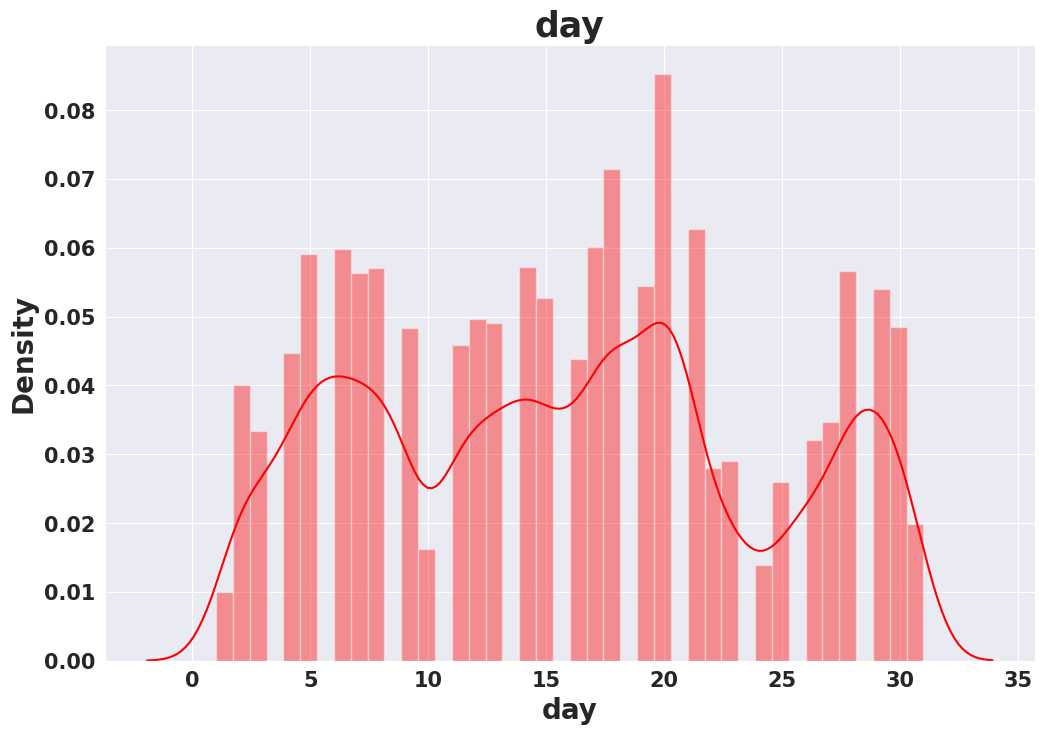

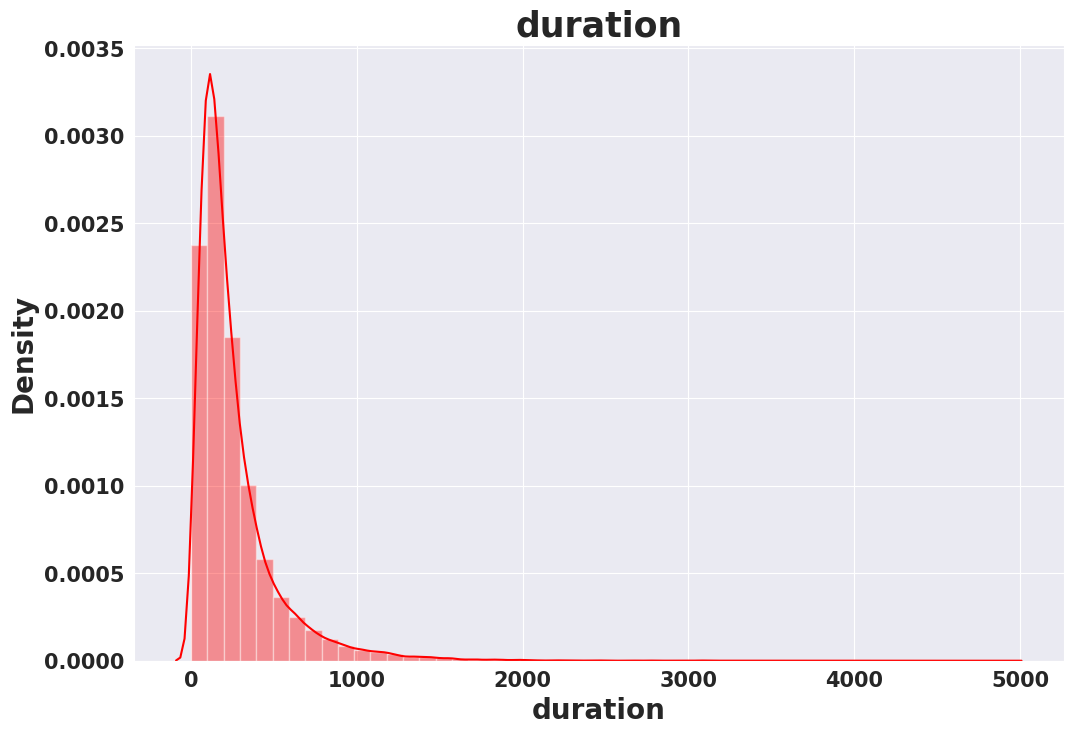

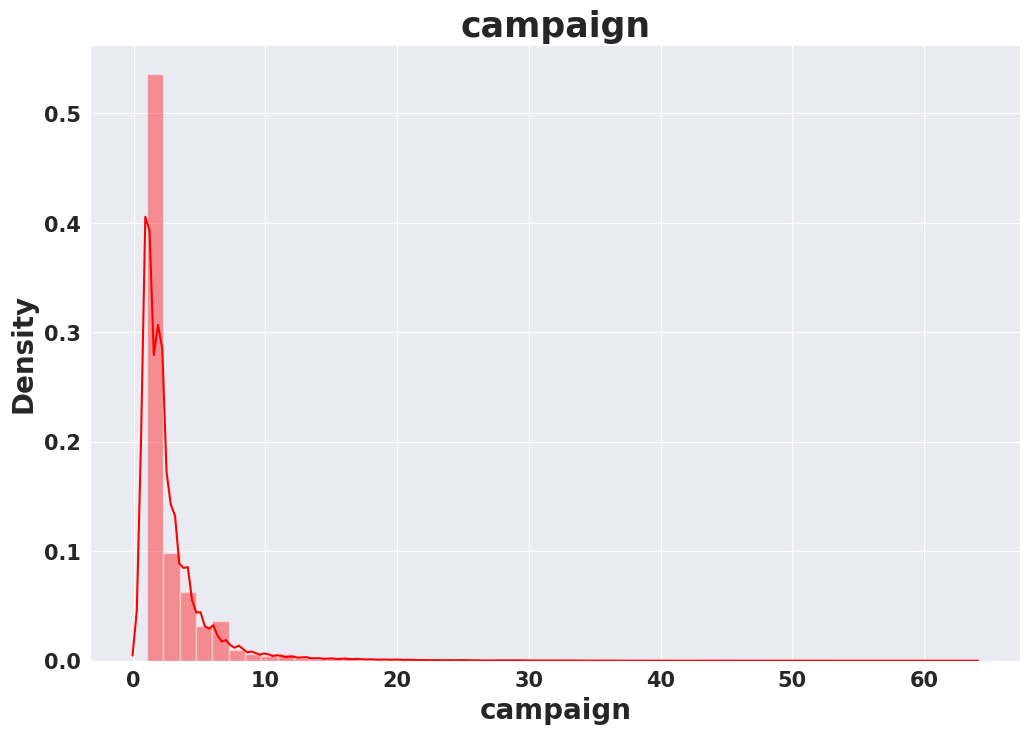

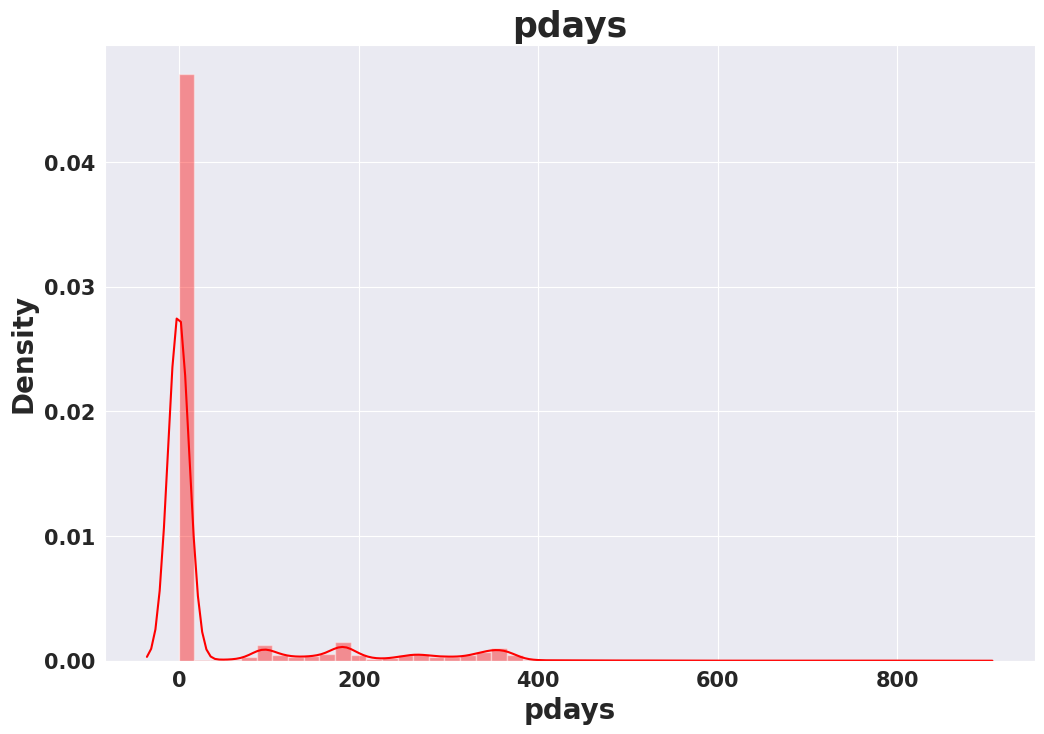

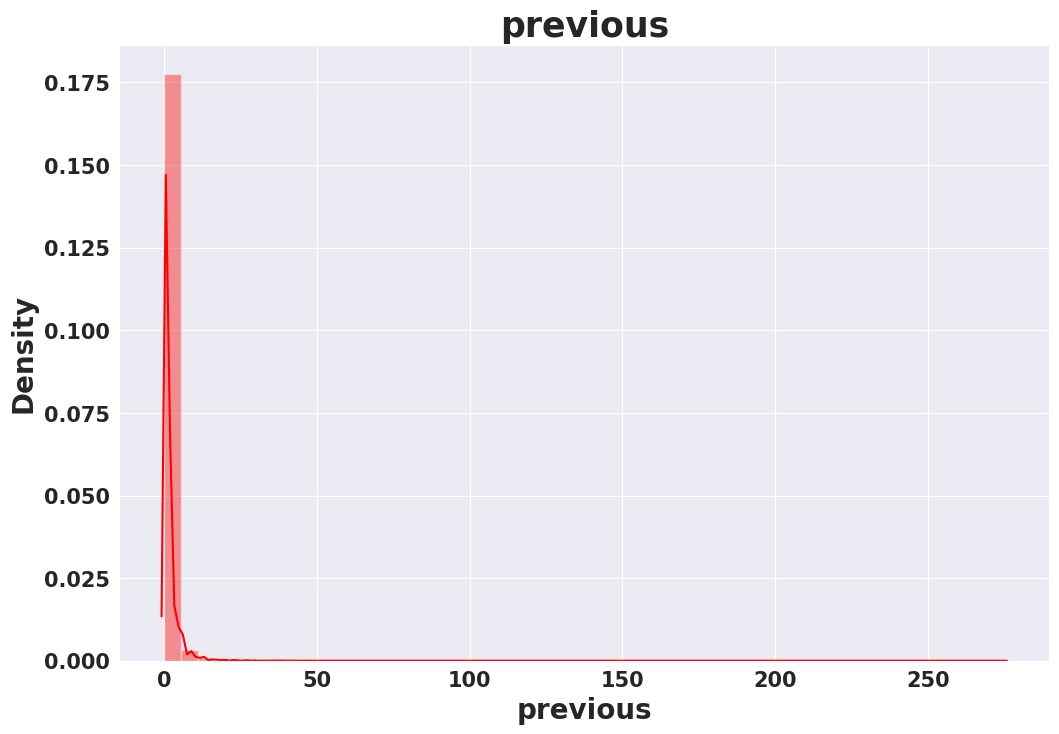

In [26]:
#checking count of each numerical  features
#running for loop to plot every category counts,setting figure size,title,xlabel and title
for feature in numerical_columns:
  plt.figure(figsize=(12,8))
  sns.distplot(df1[feature], color='r')
  plt.xlabel(feature)
  plt.title(feature)

### **Inference**
* It seems age,day are kind of normally distributed.
* balance,duration,campaign,pday,previous are heavily positive skewed and seems to be have some outliers.

## **Relation between numerical features and label**

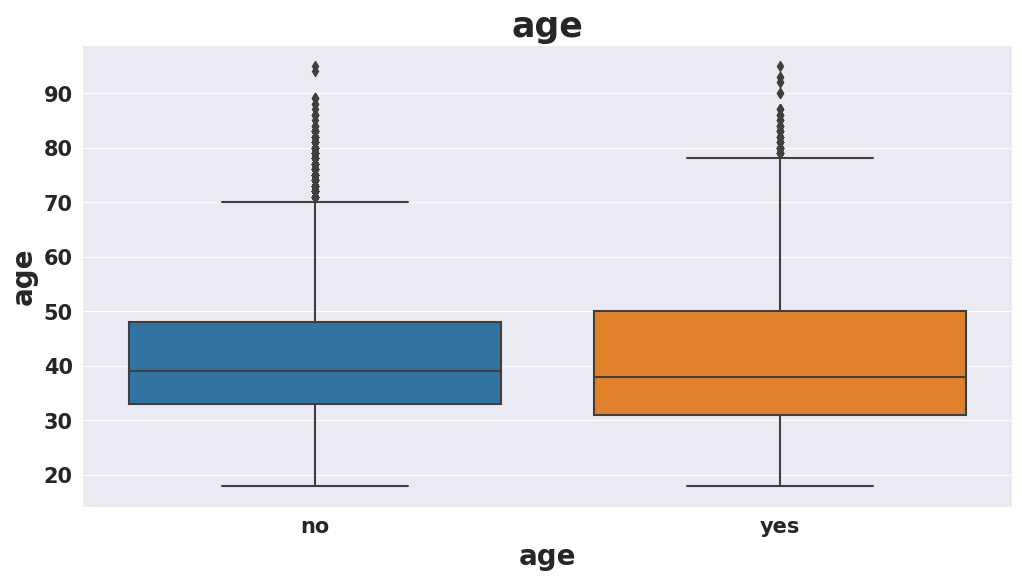

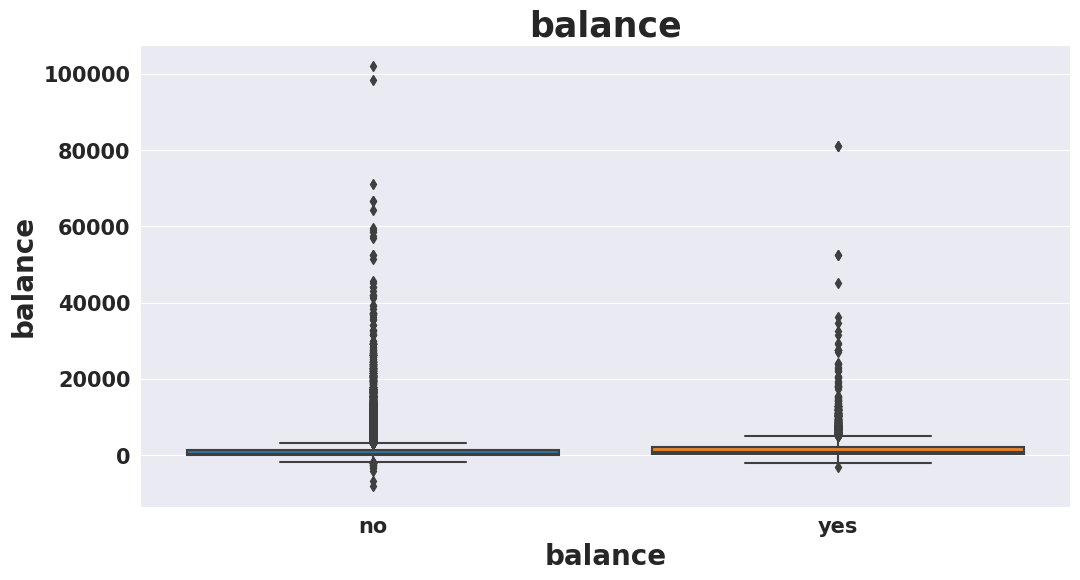

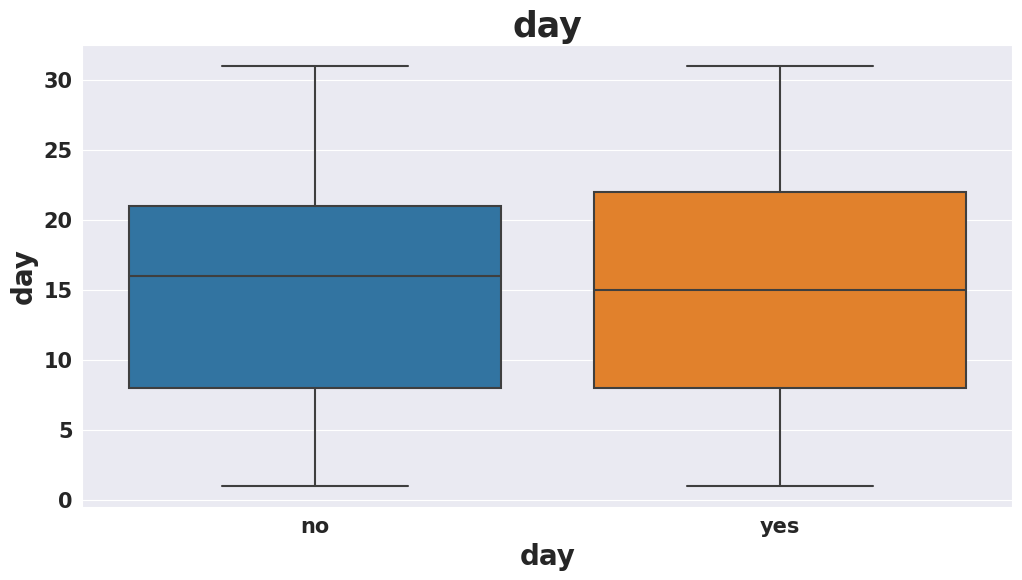

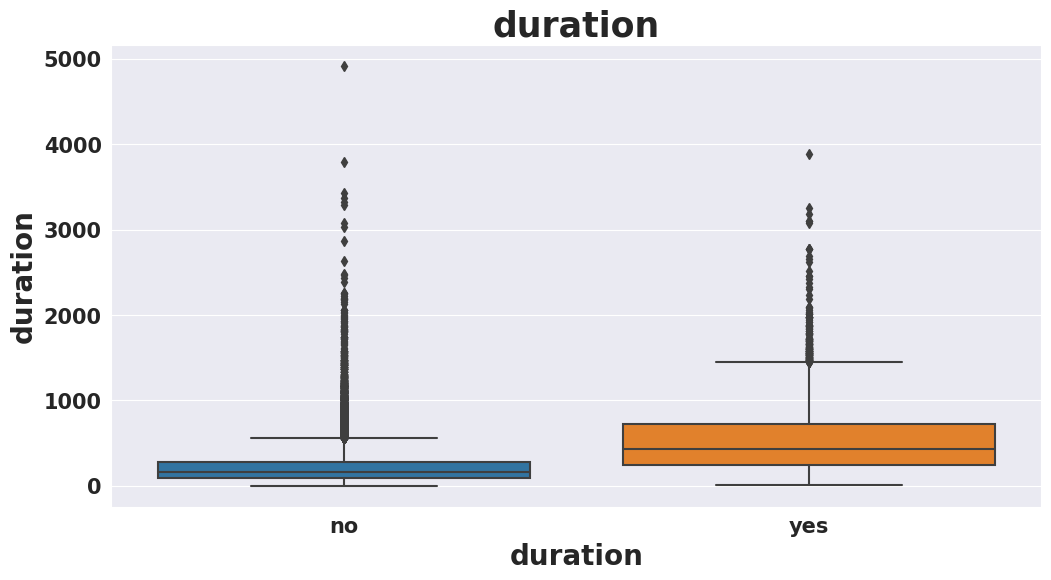

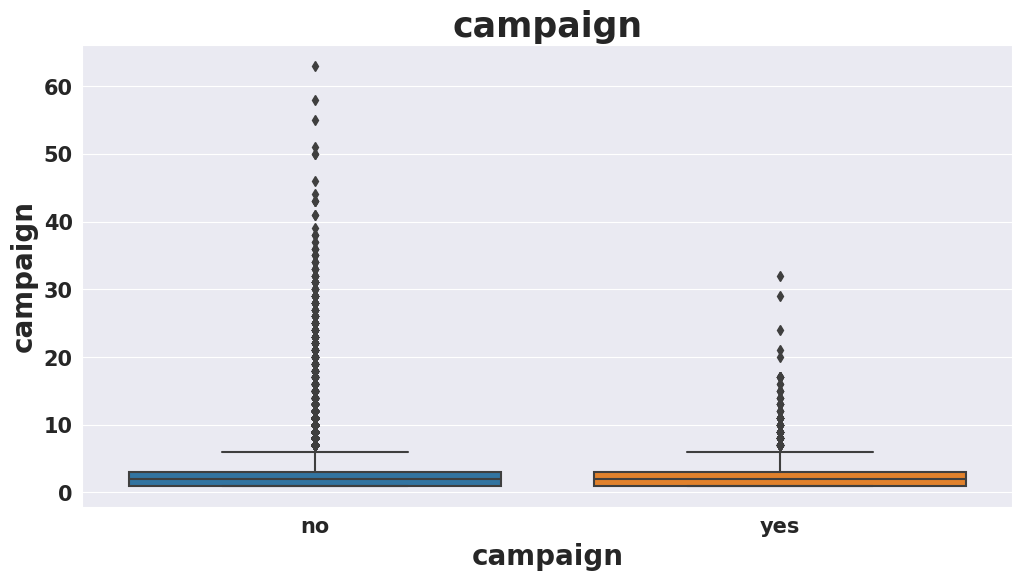

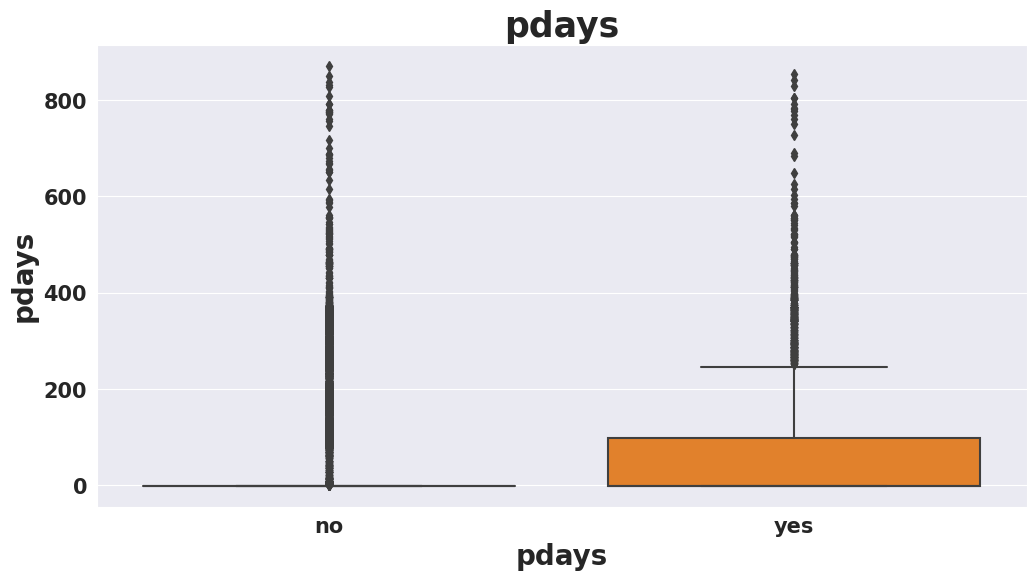

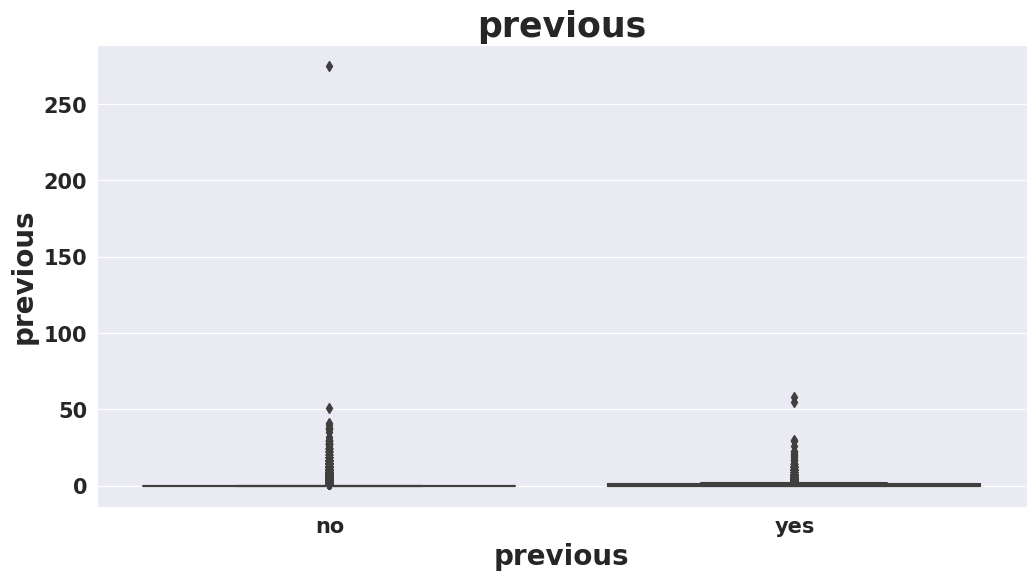

In [27]:
#plotting scatter plot to check relation betwwen numerical feature and label
#for loop to plot scatterplot
for feature in numerical_columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(x=df1['y'],y=df1[feature])
  plt.xlabel(feature)
  plt.title(feature)

Client shows interest on deposit who had discussion for longer duration.

## **Check outliers in numerical features**


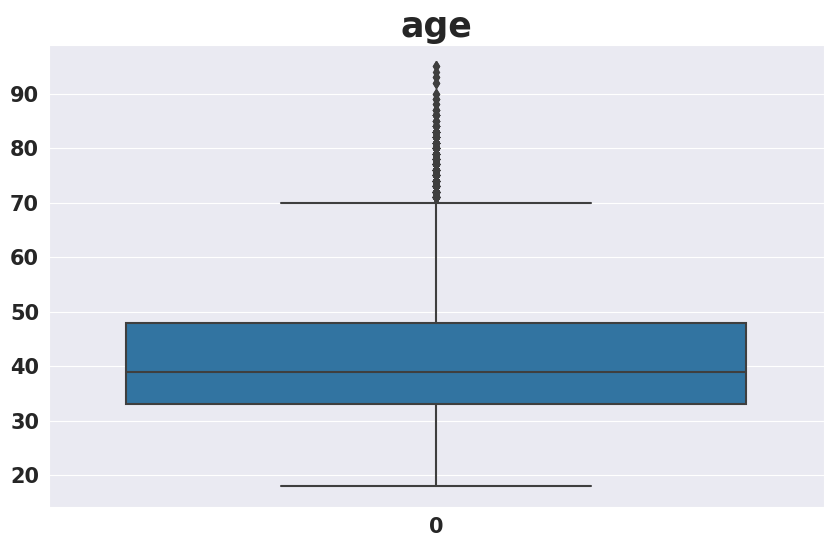

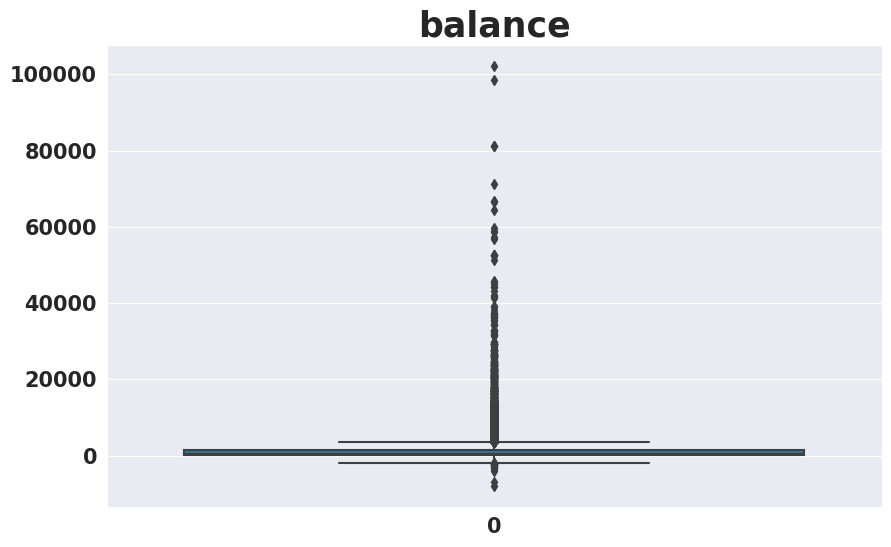

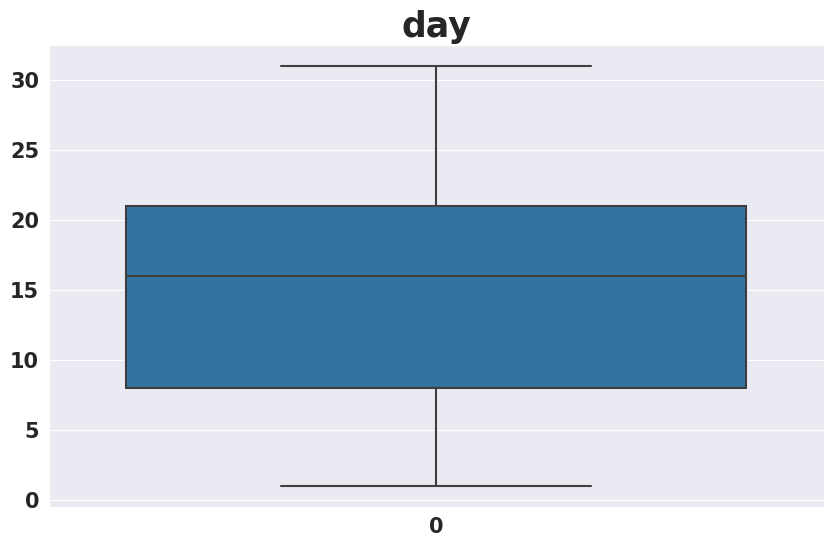

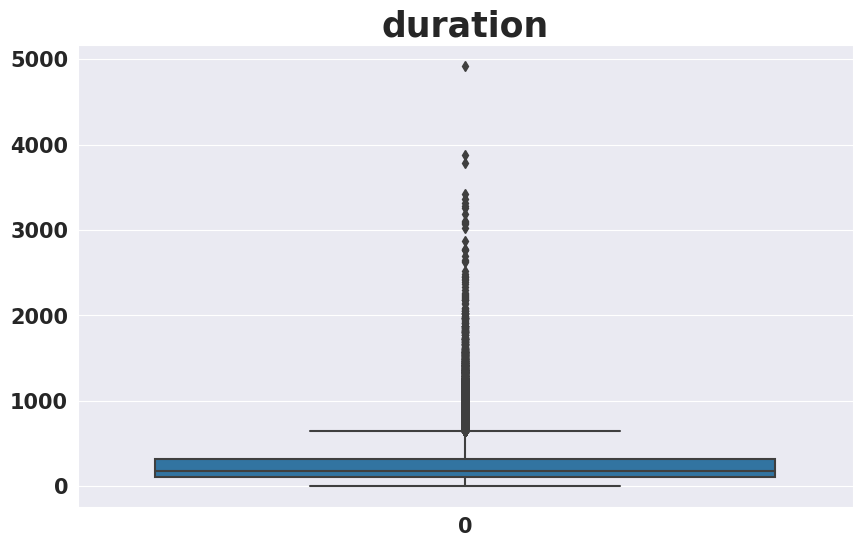

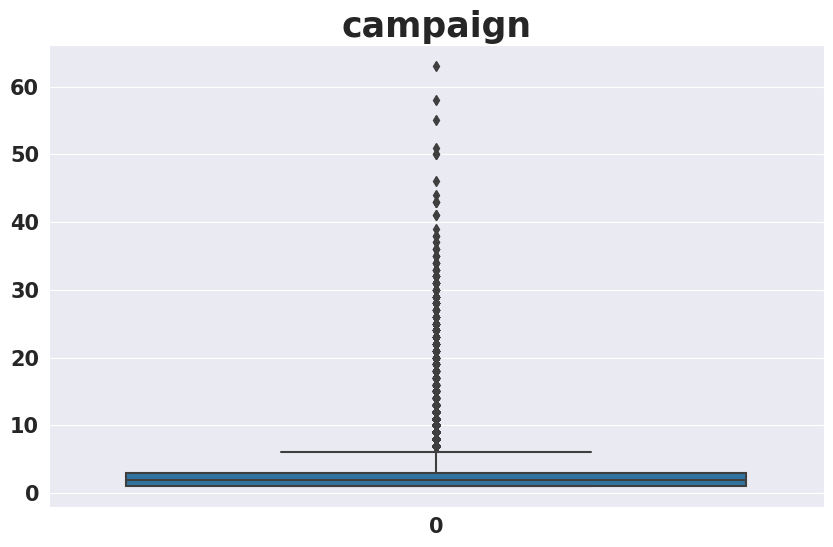

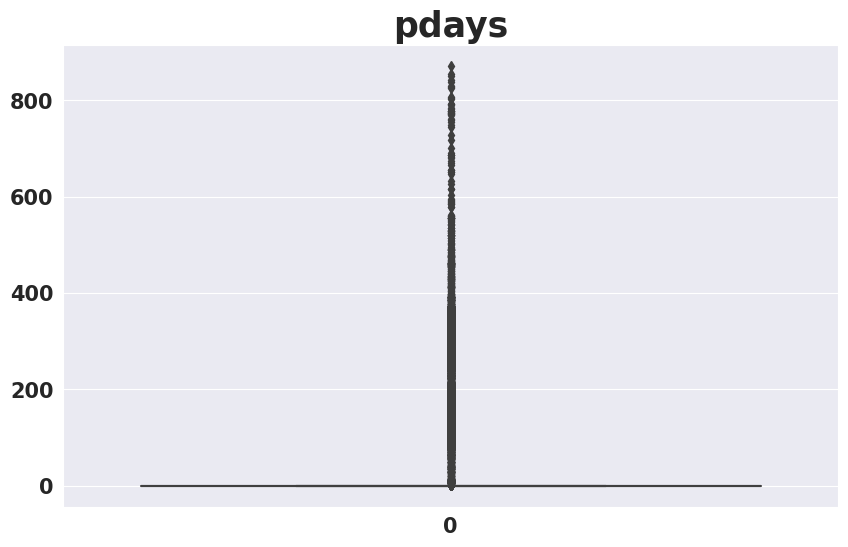

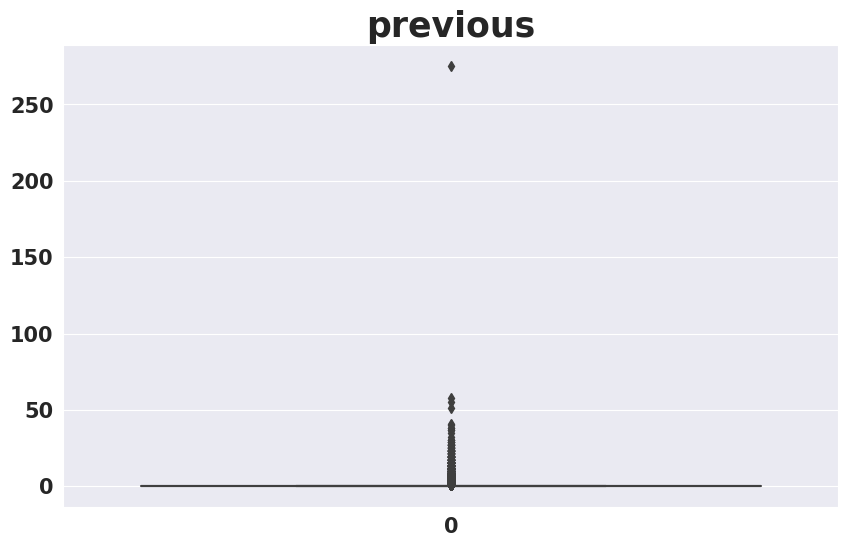

In [28]:
#using box plot to check for outliers
# for loop for plotting box plots of numerical features
for feature in numerical_columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df1[feature])
  plt.title(feature)


We can see there are outliers in most of the numerical columns.

## **Feature Engineering**

In [29]:
df1.shape

(45211, 17)

In [30]:
df1[df1['pdays']==-1]

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45203   cellular   17   nov       266         1     -1         0  unknown  yes  
45205   cellular   17   nov       386         2     -1         0  unknown  yes  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  

[36954 rows x 17 columns]

In [31]:
df1[df1['poutcome']=='unknown']

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45203   cellular   17   nov       266         1     -1         0  unknown  yes  
45205   cellular   17   nov       386         2     -1         0  unknown  yes  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  

[36959 rows x 17 columns]

In [32]:
df1[df1['previous']==0]

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45203   cellular   17   nov       266         1     -1         0  unknown  yes  
45205   cellular   17   nov       386         2     -1         0  unknown  yes  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  

[36954 rows x 17 columns]

* As seen above pdays -1 means these peoples are new or involving 1st time in campaign.
* They have no previous contact so previous ==0 and poutcomes is unknown for all -1 values of pdays
* we will drop pdays column

In [33]:
#dropping pdays column
df1.drop('pdays',inplace=True,axis=1)

In [34]:
#let's check campaign feature values
df1['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [35]:
#let's check previous features values
df1['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [36]:

df1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [37]:
#let's create 3 categories for day feature like 1-10 is 1 and 11-20 is 2 etc
day_conv_dic = {1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:2,13:2,14:2,15:2,16:2,17:2,18:2,19:2,20:2,21:3,22:3,23:3,24:3,25:3,26:3,27:3,28:3,29:3,30:3,31:3}
df1['day'].replace(day_conv_dic,inplace=True)

In [38]:
df1.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  previous poutcome   y  
0  unknown    1   may       261         1         0  unknown  no  
1  unknown    1   may       151         1         0  unknown  no  
2  unknown    1   may        76         1         0  unknown  no  
3  unknown    1   may        92         1         0  unknown  no  
4  unknown    1   may       198         1         0  unknown  no

## **Encoding Categorical Features**

* We have four feature who have binary value including target.


In [39]:
#create dictionary for binary encoding
bin_dic = {'yes':1,'no':0}

#create list of features
list1 = ['default','housing','loan','y']


for i in list1:
  df1[i]=df1[i].map(bin_dic)

We will perform one hot encoding on job,marital,education,contact,day,month,poutcome features

In [40]:
#one hot encoding
df1 = pd.get_dummies(df1,columns=['job','marital','education','month','contact','poutcome','day'])

In [41]:
df1.head()

age  default  balance  housing  loan  duration  campaign  previous  y  \
0   58        0     2143        1     0       261         1         0  0   
1   44        0       29        1     0       151         1         0  0   
2   33        0        2        1     1        76         1         0  0   
3   47        0     1506        1     0        92         1         0  0   
4   33        0        1        0     0       198         1         0  0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               1               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            1                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    0   
1                0               1                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    0   
4                0               1                  0                    0   

   education_tertiary  education_unknown  month_apr  month_aug  month_dec  \
0                   1                  0          0          0          0   
1                   0                  0          0          0          0   
2                   0                  0          0          0          0   
3                   0                  1          0          0          0   
4                   0                  1          0          0          0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          1   
2          0          0          0          0          0          1   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   month_nov  month_oct  month_sep  contact_cellular  contact_telephone  \
0          0          0          0                 0                  0   
1          0          0          0                 0                  0   
2          0          0          0                 0                  0   
3          0          0          0                 0                  0   
4          0          0          0                 0                  0   

   contact_unknown  poutcome_failure  poutcome_other  poutcome_success  \
0                1                 0               0                 0   
1                1                 0               0                 0   
2                1                 0               0                 0   
3                1                 0               0                 0   
4                1                 0               0                 0   

## **Training Model**

In [42]:
#importing all the required ML packages
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler #for feature scaling

## **Let's train model before solving class imbalance problem and check it's performance.**


In [43]:
#removing target variable from data frame to seperate feature and target
features = df1.drop('y',axis=1)

In [44]:
features.shape

(45211, 49)

In [45]:
#target variable
target = df1['y']

In [46]:
target.shape

(45211,)

In [47]:
#splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(features,target , test_size = 0.2, random_state = 0)

In [48]:
#checking shape of train and test data
print(X_train.shape)
print(X_test.shape)

(36168, 49)
(9043, 49)


## **Let's train Logistic regression**

In [49]:
#training logistic regression model
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)

Train Score :0.8963724839637248
Test score :0.8898595598805706

Classification report for Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31942
           1       0.63      0.27      0.38      4226

    accuracy                           0.90     36168
   macro avg       0.77      0.62      0.66     36168
weighted avg       0.88      0.90      0.88     36168

Classification report for Testing
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.58      0.24      0.33      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043




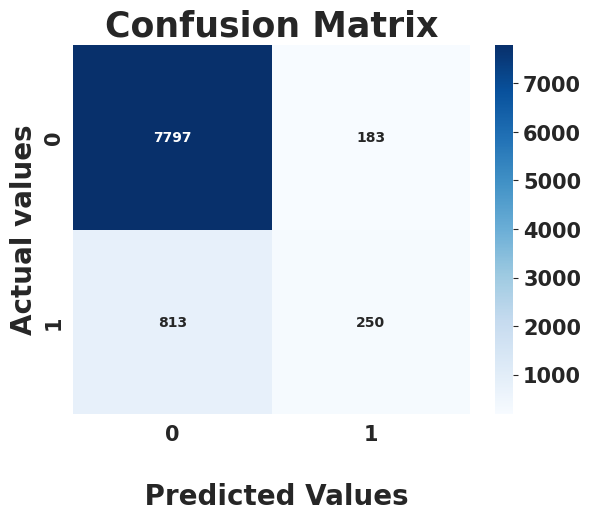

In [51]:
#check model performance and metrics
print(f'Train Score :{LR.score(X_train,y_train)}')
print(f'Test score :{accuracy_score(y_test,y_pred)}')
#to print one blank line
print()
print('Classification report for Training')
print(classification_report(y_train,y_pred_train))
print('Classification report for Testing')
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)
print()

#plotting confussion matrix
ax=sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual values')
ax.set_title('Confusion Matrix')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

*  From above confusion matrix we can see that for category 0 it predicted 7797 correctly (True Positive) and 181 time incorrectly(False Positive).
*  for category 1 it predicted 248 times correct (True Negative) and 815 incorrect(False Negative) this is because model has less data to learn for class 1 because of an class imbalance.
* Now we will solve class imbalance before training any other model.

### **Random Over-Sampling**
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

In [52]:
#check class distribution
df1['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [53]:
#importing library required for resampling
from imblearn.over_sampling import RandomOverSampler

Random = RandomOverSampler()

# fit predictor and target variable
x_trainr, y_trainr = Random.fit_resample(X_train,y_train)


print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_trainr),len(y_trainr))

Original dataset shape 36168
Resampled dataset shape 63884 63884


In [54]:
#create a function to print roc curve
def plot_roc_curve(fpr,tpr,auc_score):
  '''It takes three argument and plot roc curve and auc score
  '''

  plt.figure(figsize=(8,4))
  plt.plot(fpr,tpr,label='auc_score =' +str(auc_score))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.title('ROC curve')
  plt.show()

In [55]:
# create a function to print metrics of a model
def model_metrics(model,X_train,y_train,y_test,y_pred,y_pred_train):
  '''This function takes six arguments and print model metrics like
     model
     Train score
     Test score
     Classification Report(train and test)
     Confussion Matrix

  '''
  #check model performance and metrics
  print(f'Train Score :{model.score(X_train,y_train)}')
  print(f'Test score :{accuracy_score(y_test,y_pred)}')
  #to print one blank line
  print('Classification report for Training')
  print(classification_report(y_train,y_pred_train))
  print('Classification report for Testing')
  print(classification_report(y_test,y_pred))
  conf_matrix = confusion_matrix(y_test,y_pred)
  print()

  #plotting confussion matrix
  ax=sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
  ax.set_xlabel('\n Predicted Values')
  ax.set_ylabel('Actual values')
  ax.set_title('Confusion Matrix')
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['0','1'])
  ax.yaxis.set_ticklabels(['0','1']);

## **Feature Scaling**
Feature Scaling is a technique to normalize/standardize the independent features present in the dataset in a fixed range.

In [56]:
#importing library required fro scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_trainr = scaler.fit_transform(x_trainr)
X_test = scaler.transform(X_test)

In [57]:
#let's train logistics regression model
LR =LogisticRegression()

In [58]:
#datetime library
from datetime import datetime

#creating function to count time required to run a program
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [59]:
#import roc curve and roc auc score
from sklearn.metrics import roc_curve,roc_auc_score

In [60]:
#fitting data and initializing timer to count time
start_time = timer(None)
LR.fit(x_trainr,y_trainr)
timer(start_time)


 Time taken: 0 hours 0 minutes and 1.83 seconds.


In [61]:
#prediction
y_pred_lr = LR.predict(X_test)
y_pred_lr_train =LR.predict(x_trainr)

Train Score :0.8367822929058919
Test score :0.839765564525047
Classification report for Training
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     31942
           1       0.85      0.82      0.83     31942

    accuracy                           0.84     63884
   macro avg       0.84      0.84      0.84     63884
weighted avg       0.84      0.84      0.84     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7980
           1       0.41      0.81      0.54      1063

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.90      0.84      0.86      9043




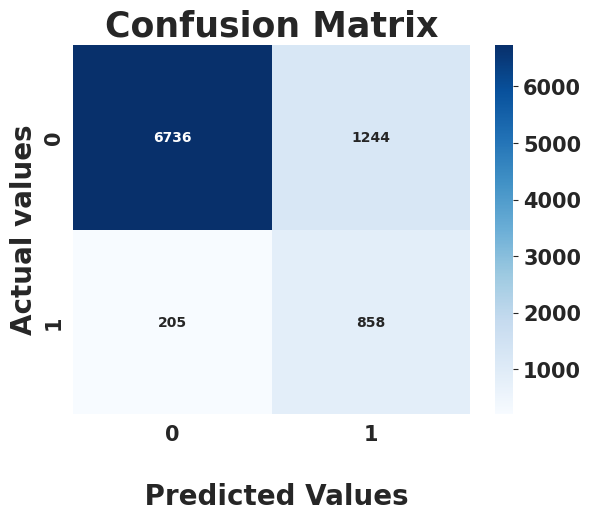

In [62]:
#printing model metrics
model_metrics(LR,x_trainr,y_trainr,y_test,y_pred_lr,y_pred_lr_train)

In [63]:
 #importing library for hyperparameter tuning
 from sklearn.model_selection import GridSearchCV

 #selecting parameter for hyperparameter tuning

 parameter ={'penalty':['l1','l2','elasticnet'],
             'C':[1,2,3,4,5,6,7,8,9,10,20,30,40],
             'max_iter':[50,100,150,200]}

## **GriSearchCV on Logistic Regression**

In [64]:
#hyperparameter tuning on Logistic regression
LR = LogisticRegression()
LR_Grid = GridSearchCV(LR,param_grid=parameter,scoring='precision',cv=5,verbose=3,n_jobs=-1)
start_time = timer(None)
LR_Grid.fit(x_trainr,y_trainr)
timer(start_time)

Fitting 5 folds for each of 156 candidates, totalling 780 fits

 Time taken: 0 hours 3 minutes and 50.03 seconds.


In [65]:
# let's check best parameter for model
LR_Grid.best_params_

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}

In [66]:
#prediciton probablity
y_pred_proba = LR_Grid.predict_proba(X_test)[::,1]

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [68]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9013711371561549

Train Score :0.8464278836895821
Test score :0.8376644918721663
Classification report for Training
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     31942
           1       0.85      0.83      0.84     31942

    accuracy                           0.84     63884
   macro avg       0.84      0.84      0.84     63884
weighted avg       0.84      0.84      0.84     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7980
           1       0.41      0.81      0.54      1063

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.90      0.84      0.86      9043




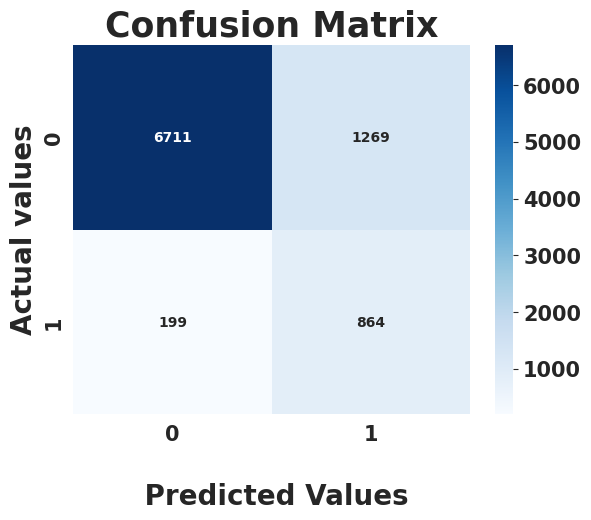

In [69]:
#prediction
y_pred_LR = LR_Grid.predict(X_test)
y_pred_LR_train=LR_Grid.predict(x_trainr)
#model metrics
model_metrics(LR_Grid,x_trainr,y_trainr,y_test,y_pred_LR,y_pred_LR_train)

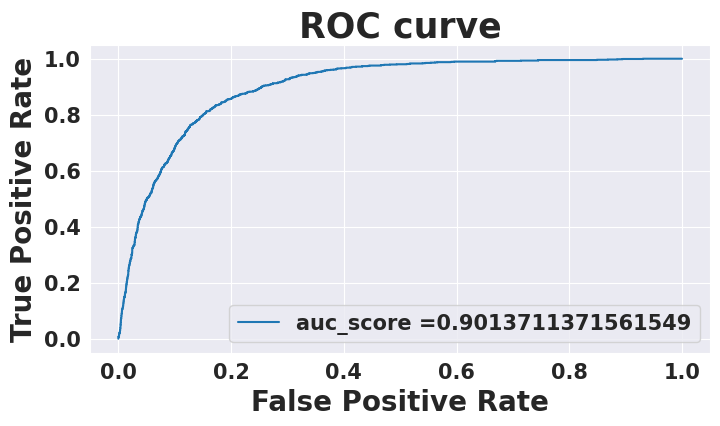

In [70]:
#roc curve plot
plot_roc_curve(fpr,tpr,auc_score)

## **Decision Tree**

In [71]:
#decision tree model
dt= DecisionTreeClassifier()
#fitting data
start_time = timer(None)
dt.fit(x_trainr,y_trainr)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.62 seconds.


In [72]:
#prediction
y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(x_trainr)

Train Score :1.0
Test score :0.8686276678093553
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31942
           1       1.00      1.00      1.00     31942

    accuracy                           1.00     63884
   macro avg       1.00      1.00      1.00     63884
weighted avg       1.00      1.00      1.00     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7980
           1       0.44      0.43      0.44      1063

    accuracy                           0.87      9043
   macro avg       0.68      0.68      0.68      9043
weighted avg       0.87      0.87      0.87      9043




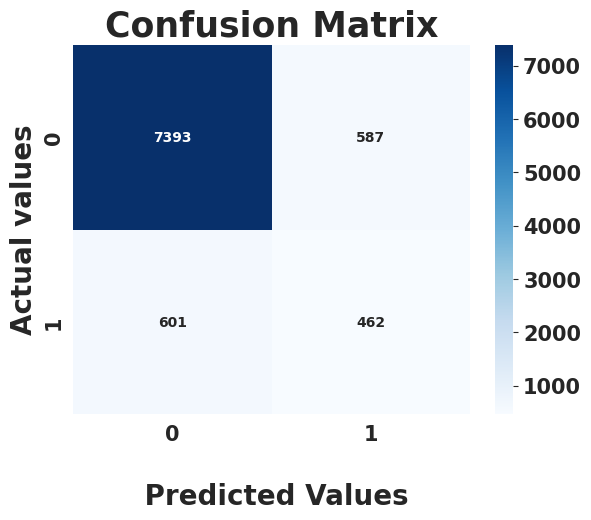

In [73]:
#model metrics
model_metrics(dt,x_trainr,y_trainr,y_test,y_pred_dt,y_pred_dt_train)

## **GridSearchCV on Decision Tree**

In [74]:
#selecting parameter for hyperparameter tuning
parameter = {"max_depth": [1,2,3,4,5,6,7,None],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
              "criterion": [ "gini","entropy"],
             "class_weight":["balanced"],
            "ccp_alpha":[0.01]}

In [75]:
tree = DecisionTreeClassifier()

In [76]:
tree_Grid = GridSearchCV(tree, param_grid=parameter, scoring='precision',cv=5,n_jobs=-1,verbose=3)
#fitting data
start_time = timer(None)
tree_Grid.fit(x_trainr,y_trainr)
timer(start_time)

Fitting 5 folds for each of 160 candidates, totalling 800 fits

 Time taken: 0 hours 2 minutes and 55.08 seconds.


In [77]:

#best parameter for model
tree_Grid.best_params_

{'ccp_alpha': 0.01,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1}

In [78]:
#prediction
y_pred_tree = tree_Grid.predict(X_test)
y_pred_tree_train = tree_Grid.predict(x_trainr)

In [79]:
#prediciton probablity
y_pred_proba = tree_Grid.predict_proba(X_test)[::,1]

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [81]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.8583258475445434

Train Score :0.8148532175490895
Test score :0.8091341369014707
Classification report for Training
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     31942
           1       0.81      0.79      0.80     31942

    accuracy                           0.80     63884
   macro avg       0.80      0.80      0.80     63884
weighted avg       0.80      0.80      0.80     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7980
           1       0.36      0.77      0.49      1063

    accuracy                           0.81      9043
   macro avg       0.66      0.79      0.68      9043
weighted avg       0.89      0.81      0.84      9043




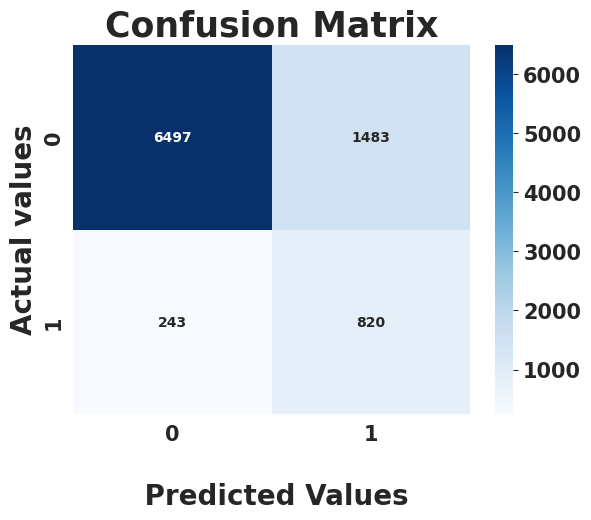

In [82]:
#model metrics
model_metrics(tree_Grid,x_trainr,y_trainr,y_test,y_pred_tree,y_pred_tree_train)

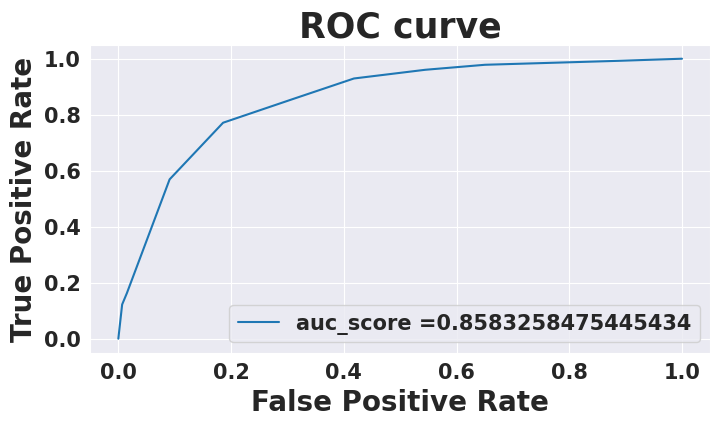

In [83]:
#plot roc curve and auc score
plot_roc_curve(fpr,tpr,auc_score)

## **Randome Forest Classifier**

In [84]:
#fitting data
rf = RandomForestClassifier()
start_time = timer(None)
rf.fit(x_trainr,y_trainr)
timer(start_time)


 Time taken: 0 hours 0 minutes and 9.23 seconds.


In [85]:
#prediction
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(x_trainr)

Train Score :1.0
Test score :0.898595598805706
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31942
           1       1.00      1.00      1.00     31942

    accuracy                           1.00     63884
   macro avg       1.00      1.00      1.00     63884
weighted avg       1.00      1.00      1.00     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7980
           1       0.58      0.52      0.55      1063

    accuracy                           0.90      9043
   macro avg       0.76      0.73      0.74      9043
weighted avg       0.89      0.90      0.90      9043




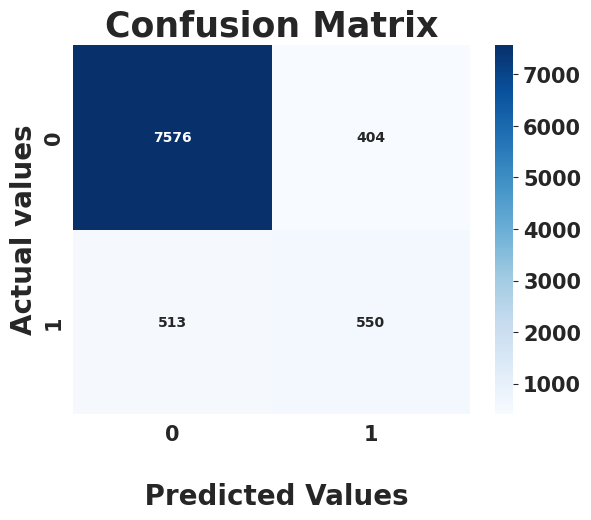

In [86]:
#model metrics
model_metrics(rf,x_trainr,y_trainr,y_test,y_pred_rf,y_pred_rf_train)

## **GridSearchCV on Random Forest**

In [87]:
#selecting paramter for hyperparamter tuning
parameter = {'n_estimators':[20,60,100,120],
             'criterion':['gini','entropy'],
             'max_depth':[2,6,8,None],
             'class_weight':['balanced','balanced_subsample'],
             'max_samples':[0.5,0.75,1.0]}


In [88]:

rf=RandomForestClassifier()
rf_Grid = GridSearchCV(rf,param_grid=parameter,scoring='precision',cv=5,verbose=3,n_jobs=-1)

In [ ]:
#fitting data
start_time = timer(None)
rf_Grid.fit(x_trainr,y_trainr)
timer(start_time)

Fitting 5 folds for each of 192 candidates, totalling 960 fits

 Time taken: 0 hours 39 minutes and 57.9 seconds.


In [ ]:
#checking best parameter of model
rf_Grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_samples': 1.0,
 'n_estimators': 20}

In [ ]:
#prediction
y_pred_rf_grid = rf_Grid.predict(X_test)
y_pred_rf_train_grid = rf_Grid.predict(x_trainr)

In [ ]:
#prediciton probablity
y_pred_proba = rf_Grid.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9121124778078782

Train Score :0.9997183186754718
Test score :0.8972686055512551
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31942
           1       1.00      1.00      1.00     31942

    accuracy                           1.00     63884
   macro avg       1.00      1.00      1.00     63884
weighted avg       1.00      1.00      1.00     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7980
           1       0.58      0.48      0.52      1063

    accuracy                           0.90      9043
   macro avg       0.75      0.72      0.73      9043
weighted avg       0.89      0.90      0.89      9043




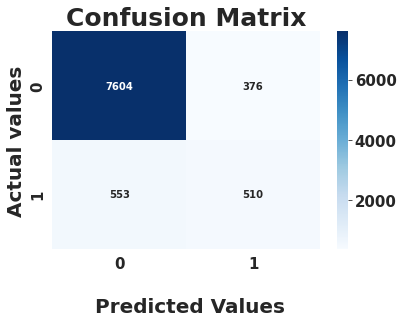

In [ ]:
#model metrics
model_metrics(rf_Grid,x_trainr,y_trainr,y_test,y_pred_rf_grid,y_pred_rf_train_grid)

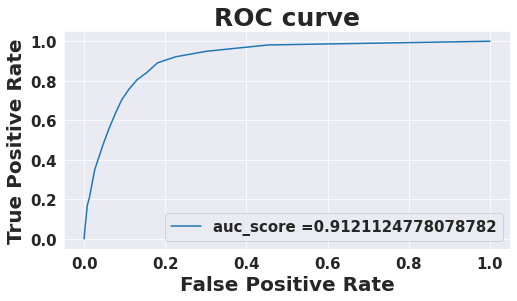

In [ ]:
#plot roc curve and auc score
plot_roc_curve(fpr,tpr,auc_score)

## **XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
#initializing xgboost classifier
xgb_clf = xgb.XGBClassifier()


In [ ]:
#fitting data
start_time = timer(None)
xgb_clf.fit(x_trainr,y_trainr)
timer(start_time)


 Time taken: 0 hours 0 minutes and 8.02 seconds.


In [ ]:
#prediction
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_train = xgb_clf.predict(x_trainr)

Train Score :0.8607945651493332
Test score :0.8327988499391795
Classification report for Training
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     31942
           1       0.84      0.89      0.86     31942

    accuracy                           0.86     63884
   macro avg       0.86      0.86      0.86     63884
weighted avg       0.86      0.86      0.86     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7980
           1       0.40      0.86      0.55      1063

    accuracy                           0.83      9043
   macro avg       0.69      0.84      0.72      9043
weighted avg       0.91      0.83      0.86      9043




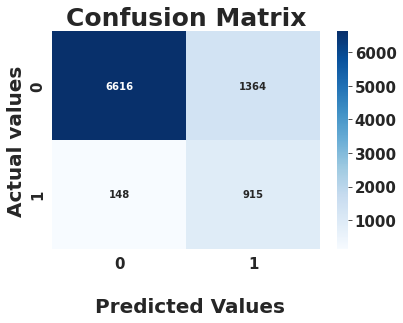

In [ ]:
#model metrics
model_metrics(xgb_clf,x_trainr,y_trainr,y_test,y_pred_xgb,y_pred_xgb_train)

In [ ]:
#parameter for xgboost classifier
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
#importing RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rand_clf = xgb.XGBClassifier()

In [ ]:
rand_grid = RandomizedSearchCV(rand_clf,param_distributions=params,scoring='precision',cv=5,verbose=3,n_jobs=-1)

In [ ]:
#fitting model with hyperparameter
start_time = timer(None)
rand_grid.fit(x_trainr,y_trainr)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Time taken: 0 hours 7 minutes and 16.38 seconds.


In [ ]:
#best parameter selected by model
rand_grid.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 15,
 'min_child_weight': 3}

In [ ]:
#prediction
y_pred = rand_grid.predict(X_test)
y_pred1 = rand_grid.predict(x_trainr)

Train Score :0.9566315030204671
Test score :0.8867632422868517
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     31942
           1       0.96      1.00      0.98     31942

    accuracy                           0.98     63884
   macro avg       0.98      0.98      0.98     63884
weighted avg       0.98      0.98      0.98     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7980
           1       0.51      0.67      0.58      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.79      0.76      9043
weighted avg       0.90      0.89      0.89      9043




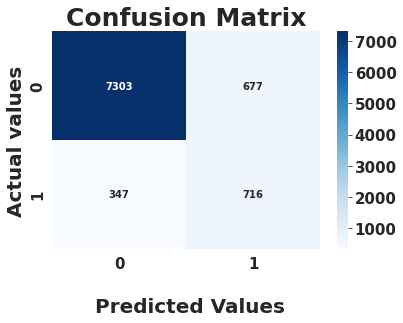

In [ ]:
#model metrics
model_metrics(rand_grid,x_trainr,y_trainr,y_test,y_pred,y_pred1)

In [ ]:
#parameter for hypeparameter tuning
params={
 "learning_rate"    : [0.15,0.01] ,
 "max_depth"        : [10,7],
 "min_child_weight" : [ 1 ,3],
 "gamma"            : [ 0.1],
 "colsample_bytree" : [ 0.5,0.3]

}

In [ ]:
#GridSearchCV on Xgboost classifier
xgb_clf = xgb.XGBClassifier()
xgb_grid = GridSearchCV(xgb_clf,param_grid=params,n_jobs=-1,scoring='precision', verbose=3,cv=5)

In [ ]:
#fitting data
start_time = timer(None)
xgb_grid.fit(x_trainr,y_trainr)
timer(start_time)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Time taken: 0 hours 12 minutes and 10.57 seconds.


In [ ]:
#best parameter for model
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 10,
 'min_child_weight': 1}

In [ ]:
#prediction
y_pred_xgb_grid = xgb_grid.predict(X_test)
y_pred_xgb_grid_train = xgb_grid.predict(x_trainr)

In [ ]:
#prediciton probablity
y_pred_proba = xgb_grid.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9210752657749738

Train Score :0.9566108231891045
Test score :0.8830034280659074
Classification report for Training
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     31942
           1       0.96      0.99      0.97     31942

    accuracy                           0.97     63884
   macro avg       0.98      0.97      0.97     63884
weighted avg       0.98      0.97      0.97     63884

Classification report for Testing
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7980
           1       0.50      0.74      0.60      1063

    accuracy                           0.88      9043
   macro avg       0.73      0.82      0.76      9043
weighted avg       0.91      0.88      0.89      9043




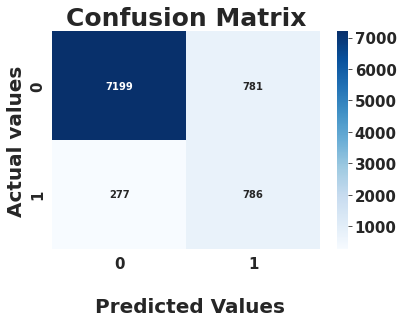

In [ ]:
#model_metrics
model_metrics(xgb_grid,x_trainr,y_trainr,y_test,y_pred_xgb_grid,y_pred_xgb_grid_train)

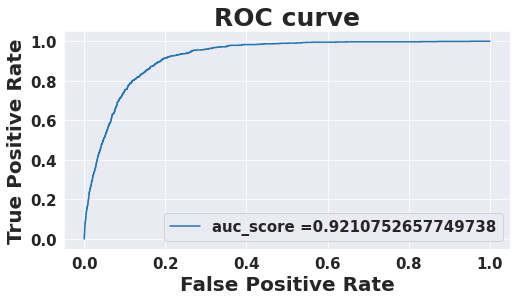

In [ ]:
#plot roc curver and auc score
plot_roc_curve(fpr,tpr,auc_score)

In [ ]:
#prediciton probablity
y_pred_proba = xgb_grid.predict_proba(X_test)[::,1]

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

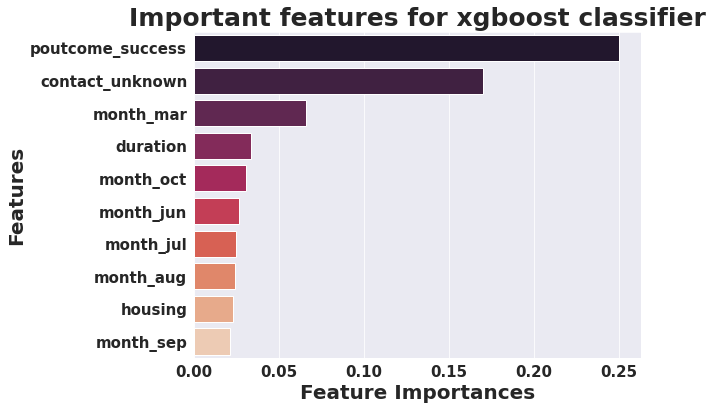

In [ ]:
#plotting important features for Xgboost
plt.figure(figsize=(8,6))
importances= xgb_optimal_model.feature_importances_
feature_importances= pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="rocket")
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Important features for xgboost classifier");

In [ ]:
feature_names = list(X_train.columns.values)

## **6.1. LIME: Local Interpretable Model-Agnostic Explanations**

In [ ]:
#importing lime library for model explainability
import lime
import lime.lime_tabular

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_trainr ,feature_names = feature_names,class_names=['0','1'])

In [ ]:
predict_fn_xgb = lambda x: xgb_grid.predict_proba(x).astype(float)

In [ ]:
# Get the explanation for observation 1
exp = explainer.explain_instance(X_test[0], predict_fn_xgb, num_features=8)
exp.show_in_notebook(show_all=False)

In [ ]:
# Get the explanation for observation 2
exp = explainer.explain_instance(X_test[1], predict_fn_xgb, num_features=8)
exp.show_in_notebook(show_all=False)

## **Conclusion**

* First we trained our model before handling class imbalance our model performed very good on 0 category and very poor for category 1.
* After solving class imbalance we trained and compared performances of logistic regression,Decision Tree classifier, Random forest classifier and Xgboost classifier.
* After tuning hyperparameter Xgboost model gives best performance (TP = 786, FP=781, TN = 7199 and FN=277) and we got auc score of 0.9210.